# NOAA-20 NUCAPS Profile 1222 UTC 23 October 2022

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skewt import SkewT
import re
from six import StringIO
import pandas as pd

'''
NOAA-20 NUCAPS Profile at 1222 UTC 23 October 2022 50.3N/5.1W
'''

press = "0 . 0 1 6   0 . 0 3 8   0 . 0 7 6   0 . 1 3 6   0 . 2 2 4   0 . 3 4 5   0 . 5 0 6   0 . 7 1 3   0 . 9 7 5   1 . 2 9 7   1 . 6 8 7   2 . 1 5 2   2 . 7   3 . 3 3 9   4 . 0 7 7   4 . 9 2   5 . 8 7 7   6 . 9 5 6   8 . 1 6 5   9 . 5 1 1   1 1 . 0   1 2 . 6   1 4 . 4   1 6 . 4   1 8 . 5   2 0 . 9   2 3 . 4   2 6 . 1   2 9 . 1   3 2 . 2   3 5 . 6   3 9 . 2   4 3 . 1   4 7 . 1   5 1 . 5   5 6 . 1   6 0 . 9   6 6 . 1   7 1 . 5   7 7 . 2   8 3 . 2   8 9 . 5   9 6 . 1   1 0 3 . 0   1 1 0 . 2   1 1 7 . 7   1 2 5 . 6   1 3 3 . 8   1 4 2 . 3   1 5 1 . 2   1 6 0 . 4   1 7 0 . 0   1 8 0 . 0   1 9 0 . 3   2 0 0 . 9   2 1 2 . 0   2 2 3 . 4   2 3 5 . 2   2 4 7 . 4   2 5 9 . 9   2 7 2 . 9   2 8 6 . 2   3 0 0 . 0   3 1 4 . 1   3 2 8 . 6   3 4 3 . 6   3 5 8 . 9   3 7 4 . 7   3 9 0 . 8   4 0 7 . 4   4 2 4 . 4   4 4 1 . 8   4 5 9 . 7   4 7 7 . 9   4 9 6 . 6   5 1 5 . 7   5 3 5 . 2   5 5 5 . 1   5 7 5 . 5   5 9 6 . 3   6 1 7 . 5   6 3 9 . 1   6 6 1 . 1   6 8 3 . 6   7 0 6 . 5   7 2 9 . 8   7 5 3 . 6   7 7 7 . 7   8 0 2 . 3   8 2 7 . 3   8 5 2 . 7   8 7 8 . 6   9 0 4 . 8   9 3 1 . 5   9 5 8 . 5   9 8 6 . 0"
temp = "1 8 8 . 0 1 5 6 2   1 9 6 . 8 2 8 1 2   2 1 1 . 4 2 1 8 8   2 2 8 . 1 2 5   2 4 2 . 4 5 3 1 2   2 5 2 . 1 7 1 8 8   2 5 7 . 6 4 0 6 2   2 6 0 . 3 1 2 5   2 6 1 . 1 0 9 3 8   2 6 0 . 2 0 3 1 2   2 5 8 . 0 4 6 8 8   2 5 1 . 7 1 8 7 5   2 4 5 . 0 3 1 2 5   2 3 9 . 7 5   2 3 4 . 7 8 1 2 5   2 3 1 . 1 4 0 6 2   2 2 7 . 4 5 3 1 2   2 2 4 . 4 2 1 8 8   2 2 1 . 6 4 0 6 2   2 1 9 . 6 2 5   2 1 8 . 0 6 2 5   2 1 7 . 0 9 3 7 5   2 1 6 . 2 5   2 1 5 . 5 6 2 5   2 1 4 . 8 9 0 6 2   2 1 4 . 1 2 5   2 1 3 . 4 5 3 1 2   2 1 2 . 8 9 0 6 2   2 1 2 . 4 0 6 2 5   2 1 2 . 0 7 8 1 2   2 1 1 . 7 6 5 6 2   2 1 1 . 6 0 9 3 8   2 1 1 . 4 8 4 3 8   2 1 1 . 4 5 3 1 2   2 1 1 . 4 2 1 8 8   2 1 1 . 6 2 5   2 1 1 . 9 3 7 5   2 1 2 . 4 8 4 3 8   2 1 3 . 1 8 7 5   2 1 4 . 2 3 4 3 8   2 1 5 . 3 9 0 6 2   2 1 6 . 3 2 8 1 2   2 1 7 . 1 0 9 3 8   2 1 7 . 8 4 3 7 5   2 1 8 . 4 6 8 7 5   2 1 9 . 0 6 2 5   2 1 9 . 6 7 1 8 8   2 2 0 . 1 8 7 5   2 2 0 . 5 1 5 6 2   2 2 0 . 4 6 8 7 5   2 2 0 . 3 2 8 1 2   2 2 0 . 0 3 1 2 5   2 1 9 . 5 1 5 6 2   2 1 8 . 9 6 8 7 5   2 1 8 . 5 7 8 1 2   2 1 8 . 3 1 2 5   2 1 8 . 2 6 5 6 2   2 1 8 . 5   2 1 9 . 1 0 9 3 8   2 1 9 . 7 5   2 2 0 . 8 2 8 1 2   2 2 2 . 1 5 6 2 5   2 2 3 . 7 5   2 2 5 . 5 3 1 2 5   2 2 8 . 0 3 1 2 5   2 3 0 . 6 5 6 2 5   2 3 3 . 3 9 0 6 2   2 3 6 . 1 4 0 6 2   2 3 8 . 9 3 7 5   2 4 1 . 7 1 8 7 5   2 4 4 . 4 6 8 7 5   2 4 7 . 3 2 8 1 2   2 5 0 . 1 2 5   2 5 2 . 8 4 3 7 5   2 5 5 . 8 1 2 5   2 5 8 . 7 3 4 3 8   2 6 1 . 5 6 2 5   2 6 4 . 2 1 8 7 5   2 6 6 . 8 4 3 7 5   2 6 9 . 3 1 2 5   2 7 1 . 2 5   2 7 3 . 4 3 7 5   2 7 5 . 8 7 5   2 7 7 . 3 4 3 7 5   2 7 8 . 7 1 8 7 5   2 8 0 . 0 3 1 2 5   2 8 1 . 2 9 6 8 8   2 8 2 . 4 5 3 1 2   2 8 3 . 5 9 3 7 5   2 8 4 . 8 4 3 7 5   2 8 6 . 2 9 6 8 8   2 8 7 . 5   2 8 8 . 9 5 3 1 2   2 9 0 . 4 0 6 2 5   2 9 1 . 7 8 1 2 5   2 9 4 . 4 0 6 2 5"
dewpt = "1 4 5 . 1 0 3 2 9   1 5 0 . 7 4 6 4 4   1 5 4 . 1 1 2 9 8   1 5 7 . 2 1 7 5 1   1 5 9 . 9 8 4 9 5   1 6 2 . 2 8 3 5 8   1 6 4 . 1 2 9 6 1   1 6 5 . 6 6 2 7 7   1 6 6 . 9 5 8 9 8   1 6 8 . 1 0 1 6 5   1 6 9 . 1 3 7 2 2   1 7 0 . 1 0 4 4 9   1 7 1 . 0 4 7 1 8   1 7 1 . 9 6 1 9 1   1 7 2 . 8 4 1 5 5   1 7 3 . 6 8 3 1 8   1 7 4 . 4 8 4   1 7 5 . 2 4 3 0 7   1 7 5 . 9 6 3 5   1 7 6 . 6 6 2 2 2   1 7 7 . 3 3 6 1 4   1 7 7 . 9 8 8 7 2   1 7 8 . 6 2 7 8 2   1 7 9 . 2 5 7 9 5   1 7 9 . 8 6 0 2 3   1 8 0 . 4 4 7 3   1 8 1 . 0 0 8 9 3   1 8 1 . 5 3 6 4   1 8 2 . 0 4 6 9 4   1 8 2 . 5 3 4 2 4   1 8 2 . 9 9 2 2 8   1 8 3 . 4 2 9 2 8   1 8 3 . 8 6 4 6 7   1 8 4 . 2 9 2 4 5   1 8 4 . 7 3 4 5 4   1 8 5 . 1 9 1 7 6   1 8 5 . 6 4 2 6 5   1 8 6 . 1 0 2 6 6   1 8 6 . 5 7 1 7   1 8 7 . 0 0 1 5 4   1 8 7 . 4 4 5 5 1   1 8 7 . 8 9 2 6 2   1 8 8 . 3 3 7 3 9   1 8 8 . 7 6 2 9 7   1 8 9 . 1 7 4 9   1 8 9 . 6 7 5 5 7   1 8 9 . 8 2 9 1   1 9 0 . 0 0 3 9   1 9 0 . 5 8 2 4 6   1 9 1 . 5 8 2 1 4   1 9 2 . 7 4 0 7 4   1 9 4 . 9 7 2 4 6   1 9 8 . 1 9 3 8   2 0 0 . 1 5 9 3 2   2 0 2 . 9 5 0 2   2 0 5 . 2 0 1 3 5   2 0 7 . 2 3 1 5 2   2 0 9 . 2 0 1 0 8   2 1 1 . 2 1 6 7 4   2 1 3 . 1 9 5 5 4   2 1 5 . 0 7 3 4 4   2 1 6 . 7 7 9 9 8   2 1 8 . 5 9 2 2   2 2 0 . 4 3 3 8 8   2 2 3 . 3 4 3 9 6   2 2 6 . 3 7 5 6 9   2 2 9 . 4 3 6 2   2 3 2 . 3 8 4 6   2 3 5 . 4 5 4 2 1   2 3 8 . 5 3 4 0 9   2 4 1 . 0 0 5 6 9   2 4 3 . 5 1 9 7 4   2 4 5 . 9 2 0 0 1   2 4 7 . 9 2 6 2 1   2 5 0 . 0 3 9 7 5   2 5 2 . 1 6 6 5   2 5 3 . 6 2 3 0 8   2 5 5 . 1 1 4 7 9   2 5 6 . 6 7 8 8   2 5 8 . 5 0 6 9 3   2 5 9 . 9 6 1 6 7   2 6 2 . 3 2 9 5 3   2 6 4 . 8 1 4 2 7   2 6 7 . 1 1 6 8 2   2 6 9 . 7 3 1 1 4   2 7 2 . 1 1 6 7 3   2 7 4 . 4 8 9 0 7   2 7 6 . 8 0 3 5 6   2 7 8 . 8 1 8 2   2 8 0 . 4 0 5 8 8   2 8 1 . 7 6 3 6 4   2 8 2 . 4 5 3 8 6   2 8 2 . 5 3 6 7 4   2 8 2 . 9 0 1 2 5   2 8 3 . 0 7 2 9 7   2 8 2 . 2 3 0 6 8"
print(press)
press = re.sub(r'\s(\.)\s+(\d)', r'\1\2', press)
press = re.sub('(?<=\d) (?=\d)', '', press)
press = re.sub(r'\s+\s', r' ', press)
print(press)
press = np.fromstring(press,dtype=float,sep=' ')
print(press,press.shape)
idx_p100 = np.where(press == 103.0)
print("Index press = 100: ", idx_p100)
print("Index press = 100: ", idx_p100[0])
print("Index press = 100: ", idx_p100[0][0])
press = press[idx_p100[0][0]:]
press = press[::-1]
print(len(press))
print(press,press.shape)

print(temp)
temp = re.sub(r'\s(\.)\s+(\d)', r'\1\2', temp)
temp = re.sub('(?<=\d) (?=\d)', '', temp)
temp = re.sub(r'\s+\s', r' ', temp)
print(temp)
temp = np.fromstring(temp,dtype=float,sep=' ')
print(temp,temp.shape)
temp = temp[idx_p100[0][0]:]
temp = temp[::-1]
print(len(temp))
print(temp,temp.shape)

print(dewpt)
dewpt = re.sub(r'\s(\.)\s+(\d)', r'\1\2', dewpt)
dewpt = re.sub('(?<=\d) (?=\d)', '', dewpt)
dewpt = re.sub(r'\s+\s', r' ', dewpt)
print(dewpt)
dewpt = np.fromstring(dewpt,dtype=float,sep=' ')
print(dewpt,dewpt.shape)
dewpt = dewpt[idx_p100[0][0]:]
dewpt = dewpt[::-1]
print(len(dewpt))
print(dewpt,dewpt.shape)
data_txt = '''
0.2
0.5
0.7
1
1.25
1.5
1.75
2
2.25
2.5
2.75
3
3.2
3.5
3.7
4.0
4.25
4.5
4.8
5
5.5
5.7
6
6.2
6.5
6.75
7
7.5
7.7
8
8.25
8.5
8.8
9
9.5
9.8
10
10.5
10.75
11
11.5
11.75
12
12.5
13
13.25
13.5
14
14.5
15
15.25
15.5
16
'''
height_km = StringIO(data_txt)
height_km = np.loadtxt(height_km, usecols=range(0, 0), unpack=True)
height_m = height_km * 1000
print(height_m,len(height_m))
height_km = height_m/1000
print(height_km,len(height_km))
pressure_pa = press
temperature_c = temp-273.15 
dewpoint_c = dewpt-273.15 
RH = 100*(np.exp((17.625*dewpoint_c)/(243.04+dewpoint_c))/np.exp((17.625*temperature_c)/(243.04+temperature_c)))
L_vapor = 2500

thetae = (273.15 + temperature_c)*((1000/pressure_pa)**0.286)+(3 * (RH * (3.884266 * 10**
         ((7.5 * temperature_c)/(237.7 + temperature_c)))/100))
wetbulb = temperature_c*(np.arctan(0.151977*((RH+8.313659)**0.5))) + (np.arctan(temperature_c+RH)) - (np.arctan(RH-1.676331))+((0.00391838*(RH**1.5))*(np.arctan(0.023101*RH))) - 4.686035
WBD = temperature_c - wetbulb
satmixrat = (6.11*(10**((7.5*temperature_c)/(237.7+temperature_c))))/1000
print("Sat_mix_ratio = ",satmixrat)
mixrat = (6.11*(10**((7.5*dewpoint_c)/(237.7+dewpoint_c))))/1000
print("Mix_ratio = ",mixrat)
thetaw = thetae - (L_vapor*mixrat)
tempvirt = temp*(1+(0.61*(mixrat)))
tempvirt_c = tempvirt - 273.15
print("Virtual Temperature (C) = ",tempvirt_c)
tempvirt_exc = tempvirt_c - temperature_c

idx_pup = np.where(press == 852.7)
idx_plo = np.where(press == 986.0)
print("PUP idx = ", idx_pup)
print("PLO idx = ", idx_plo)
T_sfc = temp[idx_plo]
T_top = temp[idx_pup]
wetbulb_sfc = wetbulb[idx_plo]
wetbulb_top = wetbulb[idx_pup]
thetaw_sfc = thetaw[idx_pup]
delta_z = 1300
delta_zkm = 1.3
gamma = (T_sfc - T_top)/(delta_zkm)
gamma_wb = (wetbulb_sfc - wetbulb_top)/(delta_zkm)
DCAPE = 0.5 * 9.81 * ((T_sfc-thetaw_sfc)/T_sfc) * delta_z
W_max = ((2*DCAPE)**0.5)*1.94384
 
mydata=dict(zip(('hght','pres','temp','dwpt','thtae','thetaw','wetbulb','depression','tempvirt','tempvirt_exc'),(height_m,pressure_pa,temperature_c,dewpoint_c,thetae,thetaw,wetbulb,WBD,tempvirt_c,tempvirt_exc)))
print(mydata)
df_ret = pd.DataFrame.from_dict(mydata)
print(df_ret)
wdir = []
wspd = []
wval = -9999.00
data_len = len(df_ret)
print("DF Length = ", data_len)
for i in range(data_len):
    wdir.append(wval)
    wspd.append(wval)
print("wdir, wspd: ", wdir, wspd)
data_sharppy=dict(zip(('pres','hght','temp','dwpt'),(pressure_pa, height_m, temperature_c, dewpoint_c)))
print(data_sharppy)
df_sharppy = pd.DataFrame.from_dict(data_sharppy)
print(df_sharppy)
df_sharppy = df_sharppy[['pres', 'hght', 'temp', 'dwpt']]
print(df_sharppy)
df_sharppy_wind =df_sharppy.assign(wdir = wdir, wspd = wspd)
print(df_sharppy_wind)
print("")
print("Sharppy formatted retrieval: ")
print("")
print(df_sharppy_wind.to_string(header=False, index=False, formatters={"pres": "  {:.2f},  ".format, "hght": "{:.2f},  ".format,
                                                                       "temp": "{:.2f},  ".format, "dwpt": "{:.2f},  ".format,
                                                                       "wdir": "{:.2f},  ".format, "wspd": "{:.2f} ".format}))
print("")
print("Gamma = ", gamma)
print("Wetbulb Gamma = ", gamma_wb)
print("DCAPE = ", DCAPE)
print("Downdraft Wmax = ", W_max)

0 . 0 1 6   0 . 0 3 8   0 . 0 7 6   0 . 1 3 6   0 . 2 2 4   0 . 3 4 5   0 . 5 0 6   0 . 7 1 3   0 . 9 7 5   1 . 2 9 7   1 . 6 8 7   2 . 1 5 2   2 . 7   3 . 3 3 9   4 . 0 7 7   4 . 9 2   5 . 8 7 7   6 . 9 5 6   8 . 1 6 5   9 . 5 1 1   1 1 . 0   1 2 . 6   1 4 . 4   1 6 . 4   1 8 . 5   2 0 . 9   2 3 . 4   2 6 . 1   2 9 . 1   3 2 . 2   3 5 . 6   3 9 . 2   4 3 . 1   4 7 . 1   5 1 . 5   5 6 . 1   6 0 . 9   6 6 . 1   7 1 . 5   7 7 . 2   8 3 . 2   8 9 . 5   9 6 . 1   1 0 3 . 0   1 1 0 . 2   1 1 7 . 7   1 2 5 . 6   1 3 3 . 8   1 4 2 . 3   1 5 1 . 2   1 6 0 . 4   1 7 0 . 0   1 8 0 . 0   1 9 0 . 3   2 0 0 . 9   2 1 2 . 0   2 2 3 . 4   2 3 5 . 2   2 4 7 . 4   2 5 9 . 9   2 7 2 . 9   2 8 6 . 2   3 0 0 . 0   3 1 4 . 1   3 2 8 . 6   3 4 3 . 6   3 5 8 . 9   3 7 4 . 7   3 9 0 . 8   4 0 7 . 4   4 2 4 . 4   4 4 1 . 8   4 5 9 . 7   4 7 7 . 9   4 9 6 . 6   5 1 5 . 7   5 3 5 . 2   5 5 5 . 1   5 7 5 . 5   5 9 6 . 3   6 1 7 . 5   6 3 9 . 1   6 6 1 . 1   6 8 3 . 6   7 0 6 . 5   7 2 9 . 8   7 5 3 . 6   7 7 7 . 

     pres     hght      temp      dwpt    wdir    wspd
0   986.0    200.0  21.25625   9.08068 -9999.0 -9999.0
1   958.5    500.0  18.63125   9.92297 -9999.0 -9999.0
2   931.5    700.0  17.25625   9.75125 -9999.0 -9999.0
3   904.8   1000.0  15.80312   9.38674 -9999.0 -9999.0
4   878.6   1250.0  14.35000   9.30386 -9999.0 -9999.0
5   852.7   1500.0  13.14688   8.61364 -9999.0 -9999.0
6   827.3   1750.0  11.69375   7.25588 -9999.0 -9999.0
7   802.3   2000.0  10.44375   5.66820 -9999.0 -9999.0
8   777.7   2250.0   9.30312   3.65356 -9999.0 -9999.0
9   753.6   2500.0   8.14688   1.33907 -9999.0 -9999.0
10  729.8   2750.0   6.88125  -1.03327 -9999.0 -9999.0
11  706.5   3000.0   5.56875  -3.41886 -9999.0 -9999.0
12  683.6   3200.0   4.19375  -6.03318 -9999.0 -9999.0
13  661.1   3500.0   2.72500  -8.33573 -9999.0 -9999.0
14  639.1   3700.0   0.28750 -10.82047 -9999.0 -9999.0
15  617.5   4000.0  -1.90000 -13.18833 -9999.0 -9999.0
16  596.3   4250.0  -3.83750 -14.64307 -9999.0 -9999.0
17  575.5 

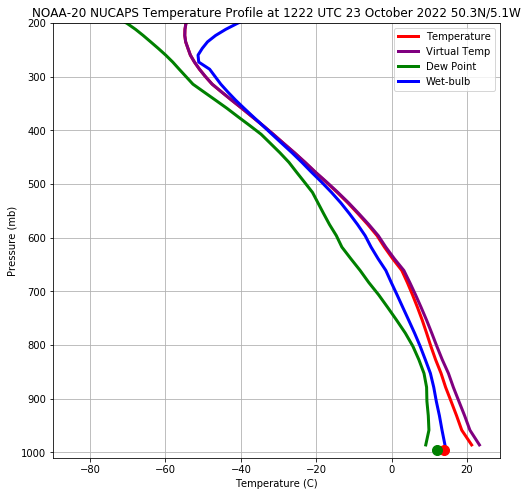

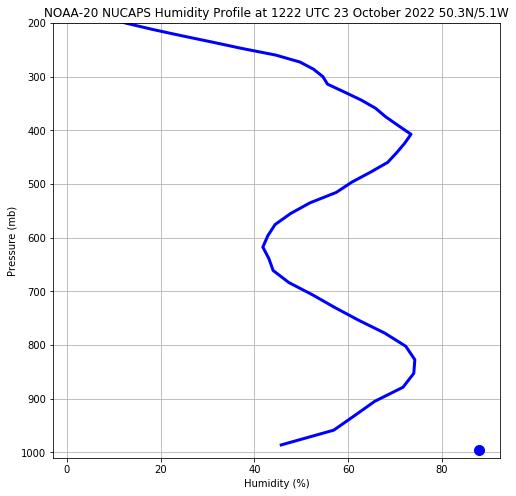

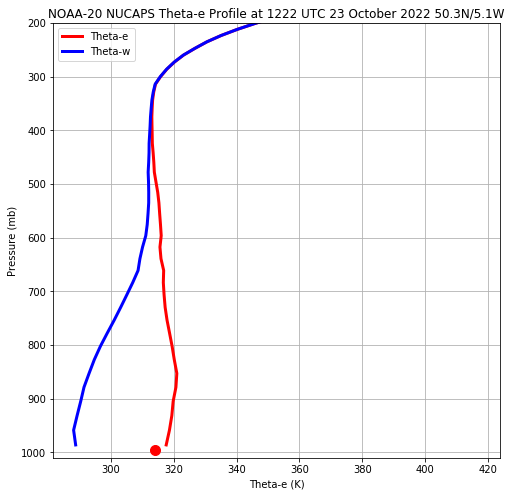

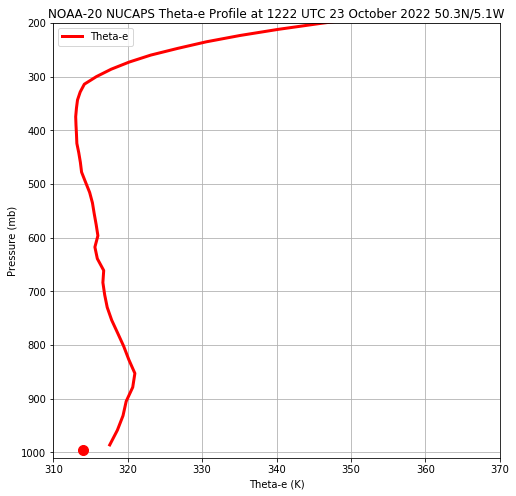

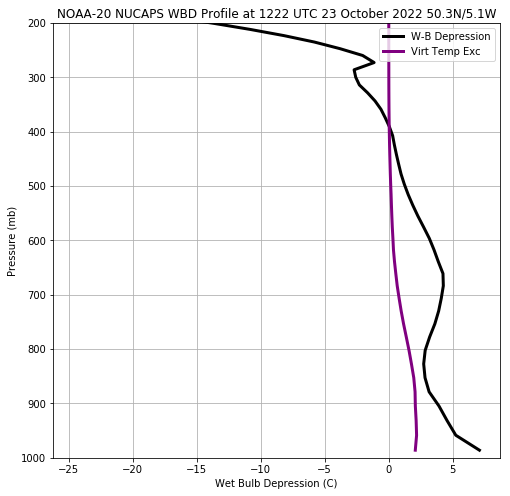

In [2]:
temperature_sfc = 14
dewpoint_sfc = 12
humidity_sfc = 88
pressure_sfc = 996
thetae_sfc = (273.15 + temperature_sfc)*((1000/pressure_sfc)**0.286)+(3 * (humidity_sfc * (3.884266 * 10**
         ((7.5 * temperature_sfc)/(237.7 + temperature_sfc)))/100))
fig = plt.figure(figsize=(8,8))
plt.plot(temperature_c,pressure_pa,color='red',linewidth=3,label='Temperature')
plt.plot(tempvirt_c,pressure_pa,color='purple',linewidth=3,label='Virtual Temp')
plt.plot(dewpoint_c,pressure_pa,color='green',linewidth=3,label='Dew Point')
plt.plot(wetbulb,pressure_pa,color='blue',linewidth=3,label='Wet-bulb')
plt.plot(temperature_sfc,pressure_sfc,'ro',markersize=10)
plt.plot(dewpoint_sfc,pressure_sfc,'go',markersize=10)
plt.ylim(1010,200)
plt.ylabel("Pressure (mb)")
plt.xlabel("Temperature (C)")
plt.title("NOAA-20 NUCAPS Temperature Profile at 1222 UTC 23 October 2022 50.3N/5.1W")
plt.grid(True)
plt.legend(loc='upper right')
plt.savefig("nucaps_temp_press_1222.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(8,8))
plt.plot(RH,pressure_pa,color='blue',linewidth=3)
plt.plot(humidity_sfc,pressure_sfc,'bo',markersize=10)
plt.ylim(1010,200)
plt.ylabel("Pressure (mb)")
plt.xlabel("Humidity (%)")
plt.title("NOAA-20 NUCAPS Humidity Profile at 1222 UTC 23 October 2022 50.3N/5.1W")
plt.grid(True)
plt.savefig("nucaps_humidity_press_1222.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(8,8))
plt.plot(thetae,pressure_pa,color='red',linewidth=3,label='Theta-e')
plt.plot(thetaw,pressure_pa,color='blue',linewidth=3,label='Theta-w')
plt.plot(thetae_sfc,pressure_sfc,'ro',markersize=10)
plt.ylim(1010,200)
plt.ylabel("Pressure (mb)")
plt.xlabel("Theta-e (K)")
plt.title("NOAA-20 NUCAPS Theta-e Profile at 1222 UTC 23 October 2022 50.3N/5.1W")
plt.grid(True)
plt.legend(loc='upper left')
plt.savefig("nucaps_thtae_press_1222.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(8,8))
plt.plot(thetae,pressure_pa,color='red',linewidth=3,label='Theta-e')
plt.plot(thetae_sfc,pressure_sfc,'ro',markersize=10)
plt.xlim(310,370)
plt.ylim(1010,200)
plt.ylabel("Pressure (mb)")
plt.xlabel("Theta-e (K)")
plt.title("NOAA-20 NUCAPS Theta-e Profile at 1222 UTC 23 October 2022 50.3N/5.1W")
plt.grid(True)
plt.legend(loc='upper left')
plt.savefig("nucaps_thtae_1222.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(8,8))
plt.plot(WBD,pressure_pa,color='black',linewidth=3,label='W-B Depression')
plt.plot(tempvirt_exc,pressure_pa,color='purple',linewidth=3,label='Virt Temp Exc')
plt.ylim(1000,200)
plt.ylabel("Pressure (mb)")
plt.xlabel("Wet Bulb Depression (C)")
plt.title("NOAA-20 NUCAPS WBD Profile at 1222 UTC 23 October 2022 50.3N/5.1W")
plt.grid(True)
plt.legend(loc='upper right')
plt.savefig("nucaps_wbd_press_1222.png",dpi=250,bbox_inches='tight')
plt.show()

# AIRS Profile 1254 UTC 23 October 2022

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from skewt import SkewT
import re
from six import StringIO
import pandas as pd

'''
AIRS Profile at 1254 UTC 23 October 2022 50.4N/5.7W
'''

press = "0 . 0 1 6   0 . 0 3 8   0 . 0 7 7   0 . 1 3 7   0 . 2 2 4   0 . 3 4 5   0 . 5 0 6   0 . 7 1 4   0 . 9 7 5   1 . 2 9 7   1 . 6 8 7   2 . 1 5 3   2 . 7 0 1   3 . 3 4   4 . 0 7 7   4 . 9 2   5 . 8 7 8   6 . 9 5 7   8 . 1 6 5   9 . 5 1 2   1 1 . 0   1 2 . 6   1 4 . 5   1 6 . 4   1 8 . 6   2 0 . 9   2 3 . 5   2 6 . 2   2 9 . 1   3 2 . 3   3 5 . 7   3 9 . 3   4 3 . 1   4 7 . 2   5 1 . 5   5 6 . 1   6 1 . 0   6 6 . 1   7 1 . 5   7 7 . 2   8 3 . 2   8 9 . 5   9 6 . 1   1 0 3 . 0   1 1 0 . 2   1 1 7 . 8   1 2 5 . 6   1 3 3 . 8   1 4 2 . 4   1 5 1 . 3   1 6 0 . 5   1 7 0 . 1   1 8 0 . 0   1 9 0 . 3   2 0 1 . 0   2 1 2 . 0   2 2 3 . 4   2 3 5 . 2   2 4 7 . 4   2 6 0 . 0   2 7 2 . 9   2 8 6 . 3   3 0 0 . 0   3 1 4 . 1   3 2 8 . 7   3 4 3 . 6   3 5 9 . 0   3 7 4 . 7   3 9 0 . 9   4 0 7 . 5   4 2 4 . 5   4 4 1 . 9   4 5 9 . 7   4 7 8 . 0   4 9 6 . 6   5 1 5 . 7   5 3 5 . 2   5 5 5 . 2   5 7 5 . 5   5 9 6 . 3   6 1 7 . 5   6 3 9 . 1   6 6 1 . 2   6 8 3 . 7   7 0 6 . 6   7 2 9 . 9   7 5 3 . 6   7 7 7 . 8   8 0 2 . 4   8 2 7 . 4   8 5 2 . 8   8 7 8 . 6   9 0 4 . 9   9 3 1 . 5   9 5 8 . 6   9 8 6 . 1"
temp = "2 0 9 . 1 2 5   2 1 5 . 9 6 8 7 5   2 2 7 . 0 1 5 6 2   2 3 7 . 9 3 7 5   2 4 7 . 2 1 8 7 5   2 5 5 . 0   2 6 0 . 6 8 7 5   2 6 2 . 5   2 6 1 . 1 4 0 6 2   2 5 7 . 6 4 0 6 2   2 5 3 . 0 4 6 8 8   2 4 5 . 0 6 2 5   2 4 0 . 2 9 6 8 8   2 3 8 . 0 7 8 1 2   2 3 5 . 0 9 3 7 5   2 3 1 . 2 1 8 7 5   2 2 6 . 9 6 8 7 5   2 2 2 . 9 3 7 5   2 1 9 . 5   2 1 7 . 2 3 4 3 8   2 1 5 . 6 8 7 5   2 1 4 . 6 0 9 3 8   2 1 4 . 2 1 8 7 5   2 1 3 . 8 7 5   2 1 3 . 5 6 2 5   2 1 3 . 1 8 7 5   2 1 2 . 8 1 2 5   2 1 2 . 4 6 8 7 5   2 1 2 . 1 5 6 2 5   2 1 2 . 0 7 8 1 2   2 1 2 . 0 1 5 6 2   2 1 2 . 1 0 9 3 8   2 1 2 . 2 1 8 7 5   2 1 2 . 5 4 6 8 8   2 1 2 . 9 6 8 7 5   2 1 3 . 3 5 9 3 8   2 1 3 . 6 5 6 2 5   2 1 3 . 9 5 3 1 2   2 1 4 . 0 3 1 2 5   2 1 4 . 0 9 3 7 5   2 1 4 . 1 4 0 6 2   2 1 4 . 1 8 7 5   2 1 4 . 2 5   2 1 4 . 6 5 6 2 5   2 1 5 . 0 4 6 8 8   2 1 5 . 7 8 1 2 5   2 1 6 . 7 5   2 1 7 . 7 0 3 1 2   2 1 8 . 7 8 1 2 5   2 1 9 . 8 1 2 5   2 2 0 . 4 8 4 3 8   2 2 1 . 0   2 2 1 . 2 6 5 6 2   2 2 1 . 0   2 2 0 . 7 5   2 2 0 . 3 5 9 3 8   2 1 9 . 9 8 4 3 8   2 2 0 . 0 6 2 5   2 2 0 . 4 2 1 8 8   2 2 1 . 0 7 8 1 2   2 2 2 . 4 5 3 1 2   2 2 3 . 8 1 2 5   2 2 5 . 7 5   2 2 7 . 6 5 6 2 5   2 2 9 . 7 8 1 2 5   2 3 1 . 9 3 7 5   2 3 4 . 1 2 5   2 3 6 . 3 2 8 1 2   2 3 8 . 5   2 4 0 . 6 5 6 2 5   2 4 2 . 7 6 5 6 2   2 4 4 . 8 1 2 5   2 4 6 . 9 0 6 2 5   2 4 9 . 2 8 1 2 5   2 5 1 . 5 4 6 8 8   2 5 3 . 3 7 5   2 5 5 . 1 7 1 8 8   2 5 6 . 9 2 1 8 8   2 5 8 . 6 4 0 6 2   2 6 0 . 3 1 2 5   2 6 1 . 9 6 8 7 5   2 6 3 . 6 0 9 3 8   2 6 5 . 2 0 3 1 2   2 6 6 . 7 8 1 2 5   2 6 8 . 3 5 9 3 8   2 6 9 . 7 9 6 8 8   2 7 1 . 1 2 5   2 7 2 . 3 4 3 7 5   2 7 3 . 5 3 1 2 5   2 7 4 . 7 3 4 3 8   2 7 5 . 9 6 8 7 5   2 7 7 . 2 6 5 6 2   2 7 8 . 5 9 3 7 5   2 8 0 . 4 3 7 5   2 8 1 . 7 1 8 7 5   2 8 3 . 5 1 5 6 2"
dewpt = "1 4 7 . 9 3 7 1   1 5 0 . 1 7 0 8   1 5 3 . 3 2 3 0 3   1 5 6 . 0 7 2 5 6   1 5 8 . 5 2 7 0 1   1 6 0 . 3 2 1 9 6   1 6 1 . 9 1 5 4 8   1 6 3 . 3 6 5 3 9   1 6 4 . 5 9 4 4 5   1 6 5 . 7 2 5 4 6   1 6 6 . 5 1 2 1 8   1 6 7 . 6 8 5 5   1 6 8 . 5 6 3 1 4   1 6 9 . 4 2 3 5 4   1 7 0 . 2 4 3 9 9   1 7 0 . 9 1 9 1 3   1 7 1 . 6 6 8 2 4   1 7 2 . 4 4 6 0 8   1 7 3 . 1 0 7 0 3   1 7 3 . 7 9 3 9 3   1 7 4 . 4 6 2 2 2   1 7 5 . 1 4 1 7 8   1 7 5 . 7 8 8 4 4   1 7 6 . 4 1 7 3 9   1 7 7 . 0 3 7 8 9   1 7 7 . 6 2 2 0 2   1 7 8 . 2 2 6 0 3   1 7 8 . 7 7 6 4 7   1 7 9 . 2 9 7 1 5   1 7 9 . 8 4 3 8 6   1 8 0 . 3 6 2 2 9   1 8 0 . 8 8 3 3 5   1 8 1 . 3 6 5   1 8 1 . 8 4 5 9 5   1 8 2 . 2 9 9 4 8   1 8 2 . 7 6 7 6   1 8 3 . 2 1 4 2 3   1 8 3 . 6 6 4 7 2   1 8 4 . 0 8 1 5   1 8 4 . 5 0 4 1 7   1 8 4 . 9 4 2 5 5   1 8 5 . 3 7 1 8   1 8 5 . 7 9 4 2 8   1 8 6 . 2 5 7 3 4   1 8 6 . 7 5 7 1 7   1 8 7 . 3 3 8 3 3   1 8 7 . 6 9 1 9 1   1 8 8 . 0 5 4 1 5   1 8 8 . 5 0 8 1   1 8 9 . 0 3 9 7 3   1 9 0 . 0 5 9 6 2   1 9 1 . 7 2 9 1 9   1 9 3 . 5 6 9 1 2   1 9 5 . 4 2 2 5   1 9 7 . 2 9 4 8 9   1 9 9 . 3 7 2 0 9   2 0 1 . 6 2 5 4 6   2 0 3 . 8 1 3 1   2 0 5 . 8 6 4 8 5   2 0 8 . 0 1 0 3   2 1 0 . 5 8 1   2 1 3 . 4 1 1 5 8   2 1 6 . 2 6 0 5 3   2 1 9 . 1 2 7 5 8   2 2 2 . 0 0 7 5 7   2 2 4 . 9 0 0 5   2 2 7 . 7 0 3   2 3 0 . 3 4 3 4   2 3 2 . 7 1 7 4   2 3 4 . 5 6 3 6 1   2 3 6 . 2 8 3 2 2   2 3 8 . 7 3 2 7   2 4 1 . 6 4 9 8 7   2 4 4 . 4 3 5 4 9   2 4 7 . 0 4 5 9   2 4 9 . 1 0 1 2 9   2 5 0 . 7 7 1 1 8   2 5 2 . 5 9 6 7   2 5 4 . 5 0 0 7 8   2 5 6 . 2 5 8 9 4   2 5 7 . 9 4 3 8   2 5 9 . 6 5 9 1 5   2 6 1 . 3 5 7 4   2 6 3 . 0 3 9 2   2 6 4 . 6 7 6 5 4   2 6 5 . 7 3 7 2   2 6 6 . 0 4 1 4   2 6 7 . 1 2 7 3   2 6 9 . 2 5 3 0 5   2 7 0 . 9 6 1   2 7 2 . 1 8 1 5 2   2 7 3 . 6 9 0 2   2 7 5 . 1 4 3 5 5   2 7 6 . 2 9 3 8 5   2 7 7 . 9 6 0 7   2 7 9 . 8 1 4"
print(press)
press = re.sub(r'\s(\.)\s+(\d)', r'\1\2', press)
press = re.sub('(?<=\d) (?=\d)', '', press)
press = re.sub(r'\s+\s', r' ', press)
print(press)
press = np.fromstring(press,dtype=float,sep=' ')
print(press,press.shape)
idx_p100 = np.where(press == 103.0)
print("Index press = 100: ", idx_p100)
print("Index press = 100: ", idx_p100[0])
print("Index press = 100: ", idx_p100[0][0])
press = press[idx_p100[0][0]:]
press = press[::-1]
print(len(press))
print(press,press.shape)

print(temp)
temp = re.sub(r'\s(\.)\s+(\d)', r'\1\2', temp)
temp = re.sub('(?<=\d) (?=\d)', '', temp)
temp = re.sub(r'\s+\s', r' ', temp)
print(temp)
temp = np.fromstring(temp,dtype=float,sep=' ')
print(temp,temp.shape)
temp = temp[idx_p100[0][0]:]
temp = temp[::-1]
print(len(temp))
print(temp,temp.shape)

print(dewpt)
dewpt = re.sub(r'\s(\.)\s+(\d)', r'\1\2', dewpt)
dewpt = re.sub('(?<=\d) (?=\d)', '', dewpt)
dewpt = re.sub(r'\s+\s', r' ', dewpt)
print(dewpt)
dewpt = np.fromstring(dewpt,dtype=float,sep=' ')
print(dewpt,dewpt.shape)
dewpt = dewpt[idx_p100[0][0]:]
dewpt = dewpt[::-1]
print(len(dewpt))
print(dewpt,dewpt.shape)
data_txt = '''
0.2
0.5
0.7
1
1.25
1.5
1.75
2
2.25
2.5
2.75
3
3.2
3.5
3.7
4.0
4.25
4.5
4.8
5
5.5
5.7
6
6.2
6.5
6.75
7
7.5
7.7
8
8.25
8.5
8.8
9
9.5
9.8
10
10.5
10.75
11
11.5
11.75
12
12.5
13
13.25
13.5
14
14.5
15
15.25
15.5
16
'''
height_km = StringIO(data_txt)
height_km = np.loadtxt(height_km, usecols=range(0, 0), unpack=True)
height_m = height_km * 1000
print(height_m,len(height_m))
height_km = height_m/1000
print(height_km,len(height_km))
pressure_pa = press
temperature_c = temp-273.15 
dewpoint_c = dewpt-273.15 
RH = 100*(np.exp((17.625*dewpoint_c)/(243.04+dewpoint_c))/np.exp((17.625*temperature_c)/(243.04+temperature_c)))
L_vapor = 2500

thetae = (273.15 + temperature_c)*((1000/pressure_pa)**0.286)+(3 * (RH * (3.884266 * 10**
         ((7.5 * temperature_c)/(237.7 + temperature_c)))/100))
wetbulb = temperature_c*(np.arctan(0.151977*((RH+8.313659)**0.5))) + (np.arctan(temperature_c+RH)) - (np.arctan(RH-1.676331))+((0.00391838*(RH**1.5))*(np.arctan(0.023101*RH))) - 4.686035
WBD = temperature_c - wetbulb
satmixrat = (6.11*(10**((7.5*temperature_c)/(237.7+temperature_c))))/1000
print("Sat_mix_ratio = ",satmixrat)
mixrat = (6.11*(10**((7.5*dewpoint_c)/(237.7+dewpoint_c))))/1000
print("Mix_ratio = ",mixrat)
thetaw = thetae - (L_vapor*mixrat)
tempvirt = temp*(1+(0.61*(mixrat)))
tempvirt_c = tempvirt - 273.15
print("Virtual Temperature (C) = ",tempvirt_c)
tempvirt_exc = tempvirt_c - temperature_c

idx_pup = np.where(press == 852.8)
idx_plo = np.where(press == 986.1)
print("PUP idx = ", idx_pup)
print("PLO idx = ", idx_plo)
T_sfc = temp[idx_plo]
T_top = temp[idx_pup]
wetbulb_sfc = wetbulb[idx_plo]
wetbulb_top = wetbulb[idx_pup]
thetaw_sfc = thetaw[idx_pup]
delta_z = 1300
delta_zkm = 1.3
gamma = (T_sfc - T_top)/(delta_zkm)
gamma_wb = (wetbulb_sfc - wetbulb_top)/(delta_zkm)
DCAPE = 0.5 * 9.81 * ((T_sfc-thetaw_sfc)/T_sfc) * delta_z
W_max = ((2*DCAPE)**0.5)*1.94384
 
mydata=dict(zip(('hght','pres','temp','dwpt','thtae','thetaw','wetbulb','depression','tempvirt','tempvirt_exc'),(height_m,pressure_pa,temperature_c,dewpoint_c,thetae,thetaw,wetbulb,WBD,tempvirt_c,tempvirt_exc)))
print(mydata)
df_ret = pd.DataFrame.from_dict(mydata)
print(df_ret)
wdir = []
wspd = []
wval = -9999.00
data_len = len(df_ret)
print("DF Length = ", data_len)
for i in range(data_len):
    wdir.append(wval)
    wspd.append(wval)
print("wdir, wspd: ", wdir, wspd)
data_sharppy=dict(zip(('pres','hght','temp','dwpt'),(pressure_pa, height_m, temperature_c, dewpoint_c)))
print(data_sharppy)
df_sharppy = pd.DataFrame.from_dict(data_sharppy)
print(df_sharppy)
df_sharppy = df_sharppy[['pres', 'hght', 'temp', 'dwpt']]
print(df_sharppy)
df_sharppy_wind =df_sharppy.assign(wdir = wdir, wspd = wspd)
print(df_sharppy_wind)
print("")
print("Sharppy formatted retrieval: ")
print("")
print(df_sharppy_wind.to_string(header=False, index=False, formatters={"pres": "  {:.2f},  ".format, "hght": "{:.2f},  ".format,
                                                                       "temp": "{:.2f},  ".format, "dwpt": "{:.2f},  ".format,
                                                                       "wdir": "{:.2f},  ".format, "wspd": "{:.2f} ".format}))
print("")
print("Gamma = ", gamma)
print("Wetbulb Gamma = ", gamma_wb)
print("DCAPE = ", DCAPE)
print("Downdraft Wmax = ", W_max)

0 . 0 1 6   0 . 0 3 8   0 . 0 7 7   0 . 1 3 7   0 . 2 2 4   0 . 3 4 5   0 . 5 0 6   0 . 7 1 4   0 . 9 7 5   1 . 2 9 7   1 . 6 8 7   2 . 1 5 3   2 . 7 0 1   3 . 3 4   4 . 0 7 7   4 . 9 2   5 . 8 7 8   6 . 9 5 7   8 . 1 6 5   9 . 5 1 2   1 1 . 0   1 2 . 6   1 4 . 5   1 6 . 4   1 8 . 6   2 0 . 9   2 3 . 5   2 6 . 2   2 9 . 1   3 2 . 3   3 5 . 7   3 9 . 3   4 3 . 1   4 7 . 2   5 1 . 5   5 6 . 1   6 1 . 0   6 6 . 1   7 1 . 5   7 7 . 2   8 3 . 2   8 9 . 5   9 6 . 1   1 0 3 . 0   1 1 0 . 2   1 1 7 . 8   1 2 5 . 6   1 3 3 . 8   1 4 2 . 4   1 5 1 . 3   1 6 0 . 5   1 7 0 . 1   1 8 0 . 0   1 9 0 . 3   2 0 1 . 0   2 1 2 . 0   2 2 3 . 4   2 3 5 . 2   2 4 7 . 4   2 6 0 . 0   2 7 2 . 9   2 8 6 . 3   3 0 0 . 0   3 1 4 . 1   3 2 8 . 7   3 4 3 . 6   3 5 9 . 0   3 7 4 . 7   3 9 0 . 9   4 0 7 . 5   4 2 4 . 5   4 4 1 . 9   4 5 9 . 7   4 7 8 . 0   4 9 6 . 6   5 1 5 . 7   5 3 5 . 2   5 5 5 . 2   5 7 5 . 5   5 9 6 . 3   6 1 7 . 5   6 3 9 . 1   6 6 1 . 2   6 8 3 . 7   7 0 6 . 6   7 2 9 . 9   7 5 3 . 6   7 7 7 

c:\programdata\anaconda2\lib\site-packages\ipykernel_launcher.py:149: RuntimeWarning: invalid value encountered in sqrt


    depression      dwpt     hght   pres      temp   tempvirt  tempvirt_exc  \
0     2.299107   6.66400    200.0  986.1  10.36562  12.057926      1.692306   
1     2.271433   4.81070    500.0  958.6   8.56875  10.047738      1.478988   
2     2.413397   3.14385    700.0  931.5   7.28750   8.597008      1.309508   
3     2.021836   1.99355   1000.0  904.9   5.44375   6.642478      1.198728   
4     2.037151   0.54020   1250.0  878.6   4.11562   5.190285      1.074665   
5     2.084327  -0.96848   1500.0  852.8   2.81875   3.777153      0.958403   
6     2.031861  -2.18900   1750.0  827.4   1.58438   2.456495      0.872115   
7     2.178041  -3.89695   2000.0  802.4   0.38125   1.145738      0.764488   
8     2.434326  -6.02270   2250.0  777.8  -0.80625  -0.158335      0.647915   
9     2.318435  -7.10860   2500.0  753.6  -2.02500  -1.431620      0.593380   
10    1.927350  -7.41280   2750.0  729.9  -3.35312  -2.776370      0.576750   
11    1.741224  -8.47346   3000.0  706.6  -4.79062  

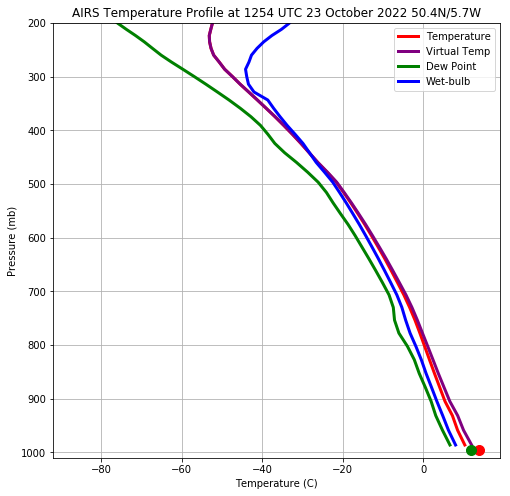

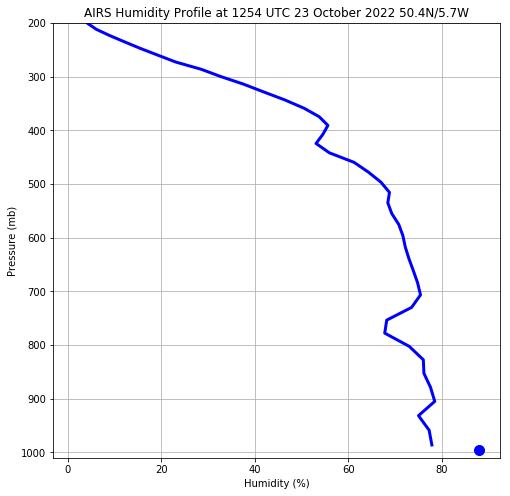

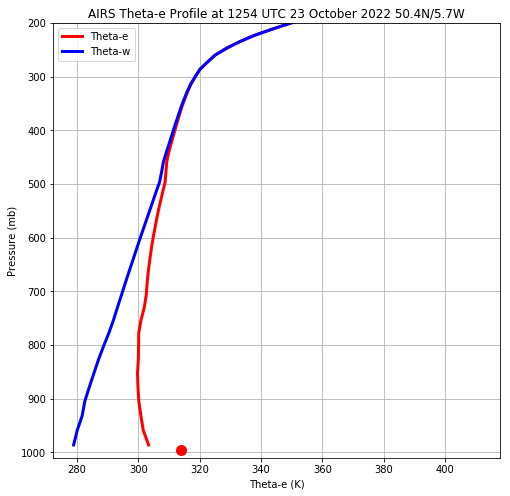

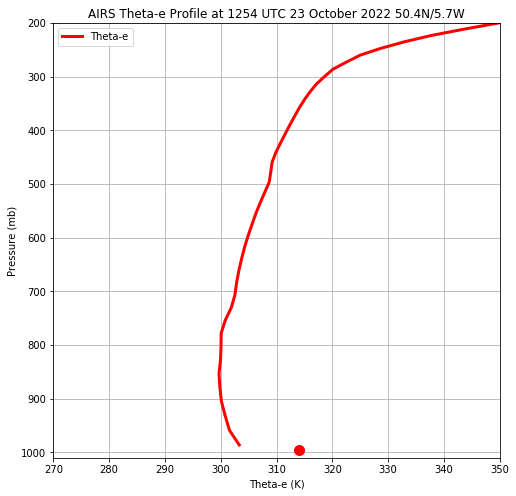

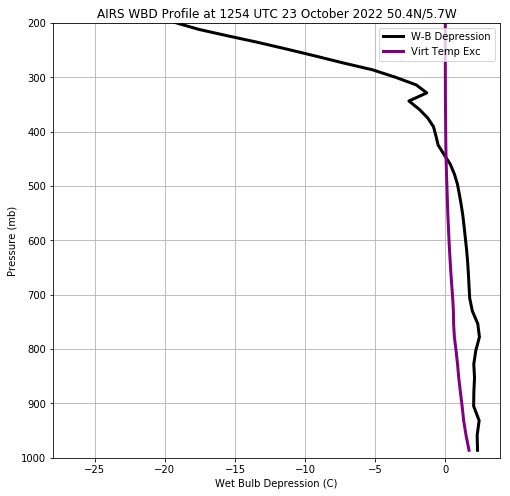

In [4]:
temperature_sfc = 14
dewpoint_sfc = 12
humidity_sfc = 88
pressure_sfc = 996
thetae_sfc = (273.15 + temperature_sfc)*((1000/pressure_sfc)**0.286)+(3 * (humidity_sfc * (3.884266 * 10**
         ((7.5 * temperature_sfc)/(237.7 + temperature_sfc)))/100))
fig = plt.figure(figsize=(8,8))
plt.plot(temperature_c,pressure_pa,color='red',linewidth=3,label='Temperature')
plt.plot(tempvirt_c,pressure_pa,color='purple',linewidth=3,label='Virtual Temp')
plt.plot(dewpoint_c,pressure_pa,color='green',linewidth=3,label='Dew Point')
plt.plot(wetbulb,pressure_pa,color='blue',linewidth=3,label='Wet-bulb')
plt.plot(temperature_sfc,pressure_sfc,'ro',markersize=10)
plt.plot(dewpoint_sfc,pressure_sfc,'go',markersize=10)
plt.ylim(1010,200)
plt.ylabel("Pressure (mb)")
plt.xlabel("Temperature (C)")
plt.title("AIRS Temperature Profile at 1254 UTC 23 October 2022 50.4N/5.7W")
plt.grid(True)
plt.legend(loc='upper right')
plt.savefig("airs_temp_press_1254.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(8,8))
plt.plot(RH,pressure_pa,color='blue',linewidth=3)
plt.plot(humidity_sfc,pressure_sfc,'bo',markersize=10)
plt.ylim(1010,200)
plt.ylabel("Pressure (mb)")
plt.xlabel("Humidity (%)")
plt.title("AIRS Humidity Profile at 1254 UTC 23 October 2022 50.4N/5.7W")
plt.grid(True)
plt.savefig("airs_humidity_press_1254.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(8,8))
plt.plot(thetae,pressure_pa,color='red',linewidth=3,label='Theta-e')
plt.plot(thetaw,pressure_pa,color='blue',linewidth=3,label='Theta-w')
plt.plot(thetae_sfc,pressure_sfc,'ro',markersize=10)
plt.ylim(1010,200)
plt.ylabel("Pressure (mb)")
plt.xlabel("Theta-e (K)")
plt.title("AIRS Theta-e Profile at 1254 UTC 23 October 2022 50.4N/5.7W")
plt.grid(True)
plt.legend(loc='upper left')
plt.savefig("airs_thtae_press_1254.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(8,8))
plt.plot(thetae,pressure_pa,color='red',linewidth=3,label='Theta-e')
plt.plot(thetae_sfc,pressure_sfc,'ro',markersize=10)
plt.xlim(270,350)
plt.ylim(1010,200)
plt.ylabel("Pressure (mb)")
plt.xlabel("Theta-e (K)")
plt.title("AIRS Theta-e Profile at 1254 UTC 23 October 2022 50.4N/5.7W")
plt.grid(True)
plt.legend(loc='upper left')
plt.savefig("airs_thtae_1254.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(8,8))
plt.plot(WBD,pressure_pa,color='black',linewidth=3,label='W-B Depression')
plt.plot(tempvirt_exc,pressure_pa,color='purple',linewidth=3,label='Virt Temp Exc')
plt.ylim(1000,200)
plt.ylabel("Pressure (mb)")
plt.xlabel("Wet Bulb Depression (C)")
plt.title("AIRS WBD Profile at 1254 UTC 23 October 2022 50.4N/5.7W")
plt.grid(True)
plt.legend(loc='upper right')
plt.savefig("airs_wbd_press_1254.png",dpi=250,bbox_inches='tight')
plt.show()

# NOAA-20 NUCAPS Profile 1222 UTC 23 October 2022

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skewt import SkewT
import re
from six import StringIO
import pandas as pd

'''
NOAA-20 NUCAPS Profile at 1222 UTC 23 October 2022 51N/0.1W
'''

press = "0 . 0 1 6   0 . 0 3 8   0 . 0 7 6   0 . 1 3 6   0 . 2 2 4   0 . 3 4 5   0 . 5 0 6   0 . 7 1 3   0 . 9 7 5   1 . 2 9 7   1 . 6 8 7   2 . 1 5 2   2 . 7   3 . 3 3 9   4 . 0 7 7   4 . 9 2   5 . 8 7 7   6 . 9 5 6   8 . 1 6 5   9 . 5 1 1   1 1 . 0   1 2 . 6   1 4 . 4   1 6 . 4   1 8 . 5   2 0 . 9   2 3 . 4   2 6 . 1   2 9 . 1   3 2 . 2   3 5 . 6   3 9 . 2   4 3 . 1   4 7 . 1   5 1 . 5   5 6 . 1   6 0 . 9   6 6 . 1   7 1 . 5   7 7 . 2   8 3 . 2   8 9 . 5   9 6 . 1   1 0 3 . 0   1 1 0 . 2   1 1 7 . 7   1 2 5 . 6   1 3 3 . 8   1 4 2 . 3   1 5 1 . 2   1 6 0 . 4   1 7 0 . 0   1 8 0 . 0   1 9 0 . 3   2 0 0 . 9   2 1 2 . 0   2 2 3 . 4   2 3 5 . 2   2 4 7 . 4   2 5 9 . 9   2 7 2 . 9   2 8 6 . 2   3 0 0 . 0   3 1 4 . 1   3 2 8 . 6   3 4 3 . 6   3 5 8 . 9   3 7 4 . 7   3 9 0 . 8   4 0 7 . 4   4 2 4 . 4   4 4 1 . 8   4 5 9 . 7   4 7 7 . 9   4 9 6 . 6   5 1 5 . 7   5 3 5 . 2   5 5 5 . 1   5 7 5 . 5   5 9 6 . 3   6 1 7 . 5   6 3 9 . 1   6 6 1 . 1   6 8 3 . 6   7 0 6 . 5   7 2 9 . 8   7 5 3 . 6   7 7 7 . 7   8 0 2 . 3   8 2 7 . 3   8 5 2 . 7   8 7 8 . 6   9 0 4 . 8   9 3 1 . 5   9 5 8 . 5   9 8 6 . 0"
temp = "1 8 6 . 8 1 2 5   1 9 5 . 7 1 8 7 5   2 1 0 . 2 3 4 3 8   2 2 6 . 8 2 8 1 2   2 4 1 . 0 3 1 2 5   2 5 0 . 5 7 8 1 2   2 5 5 . 8 7 5   2 5 8 . 3 9 0 6 2   2 5 9 . 0 3 1 2 5   2 5 8 . 2 1 8 7 5   2 5 5 . 8 7 5   2 5 1 . 2 3 4 3 8   2 4 6 . 1 8 7 5   2 4 1 . 5 9 3 7 5   2 3 6 . 9 6 8 7 5   2 3 3 . 1 7 1 8 8   2 2 9 . 2 8 1 2 5   2 2 5 . 7 5   2 2 2 . 3 7 5   2 1 9 . 5 7 8 1 2   2 1 7 . 1 8 7 5   2 1 5 . 6 2 5   2 1 4 . 2 9 6 8 8   2 1 3 . 2 6 5 6 2   2 1 2 . 5 1 5 6 2   2 1 2 . 1 4 0 6 2   2 1 1 . 9 8 4 3 8   2 1 2 . 1 2 5   2 1 2 . 2 8 1 2 5   2 1 2 . 4 5 3 1 2   2 1 2 . 5 4 6 8 8   2 1 2 . 6 8 7 5   2 1 2 . 7 3 4 3 8   2 1 2 . 6 0 9 3 8   2 1 2 . 4 2 1 8 8   2 1 2 . 4 0 6 2 5   2 1 2 . 4 6 8 7 5   2 1 2 . 6 4 0 6 2   2 1 2 . 7 9 6 8 8   2 1 2 . 9 3 7 5   2 1 3 . 1 2 5   2 1 3 . 4 0 6 2 5   2 1 3 . 7 3 4 3 8   2 1 4 . 0 3 1 2 5   2 1 4 . 3 4 3 7 5   2 1 4 . 8 4 3 7 5   2 1 5 . 4 6 8 7 5   2 1 6 . 1 8 7 5   2 1 6 . 8 5 9 3 8   2 1 7 . 4 0 6 2 5   2 1 7 . 9 3 7 5   2 1 8 . 4 2 1 8 8   2 1 8 . 7 5   2 1 9 . 0 3 1 2 5   2 1 9 . 0 3 1 2 5   2 1 9 . 0 1 5 6 2   2 1 9 . 1 8 7 5   2 1 9 . 6 5 6 2 5   2 2 0 . 5 1 5 6 2   2 2 1 . 4 5 3 1 2   2 2 2 . 7 3 4 3 8   2 2 4 . 2 6 5 6 2   2 2 6 . 0 3 1 2 5   2 2 7 . 9 3 7 5   2 3 0 . 1 0 9 3 8   2 3 2 . 4 3 7 5   2 3 4 . 7 6 5 6 2   2 3 7 . 0 6 2 5   2 3 9 . 3 4 3 7 5   2 4 1 . 5 9 3 7 5   2 4 3 . 7 8 1 2 5   2 4 5 . 9 6 8 7 5   2 4 8 . 1 4 0 6 2   2 5 0 . 2 3 4 3 8   2 5 2 . 5 3 1 2 5   2 5 4 . 7 5   2 5 6 . 8 7 5   2 5 8 . 8 7 5   2 6 0 . 8 9 0 6 2   2 6 2 . 8 7 5   2 6 4 . 4 8 4 3 8   2 6 6 . 4 6 8 7 5   2 6 8 . 5 3 1 2 5   2 7 0 . 3 9 0 6 2   2 7 2 . 4 6 8 7 5   2 7 4 . 5 7 8 1 2   2 7 6 . 4 0 6 2 5   2 7 8 . 2 8 1 2 5   2 8 0 . 2 5   2 8 2 . 3 2 8 1 2   2 8 4 . 6 4 0 6 2   2 8 7 . 1 8 7 5   2 8 9 . 1 5 6 2 5   2 9 0 . 4 0 6 2 5   2 9 1 . 1 7 1 8 8   2 9 2 . 0 7 8 1 2"
dewpt = "1 4 5 . 4 2 1 5 1   1 5 1 . 0 8 5 3   1 5 4 . 4 6 8 4 3   1 5 7 . 6 1 6 7 8   1 6 0 . 3 9 5 0 3   1 6 2 . 6 8 1 7 5   1 6 4 . 5 1 9 4 4   1 6 6 . 0 5 7 8 3   1 6 7 . 3 7 0 2 7   1 6 8 . 5 2 4 3 4   1 6 9 . 5 7 9 4 4   1 7 0 . 5 6 6 2 1   1 7 1 . 5 1 5 3 7   1 7 2 . 4 2 7 4 4   1 7 3 . 3 0 3 9 9   1 7 4 . 1 4 6 7   1 7 4 . 9 4 8 2 1   1 7 5 . 7 0 7 6 6   1 7 6 . 4 3 2 8 8   1 7 7 . 1 3 1 4 5   1 7 7 . 8 0 5   1 7 8 . 4 5 7   1 7 9 . 0 9 0 4 2   1 7 9 . 7 1 4 6 6   1 8 0 . 3 1 5 7 5   1 8 0 . 9 0 1 4 4   1 8 1 . 4 6 6 5 8   1 8 1 . 9 9 7 3 9   1 8 2 . 5 1 6 3 1   1 8 3 . 0 0 6 7 3   1 8 3 . 4 6 7 7 1   1 8 3 . 9 1 2 8   1 8 4 . 3 4 5 7 3   1 8 4 . 7 6 5 6 1   1 8 5 . 1 9 9 7 8   1 8 5 . 6 4 9 0 5   1 8 6 . 1 0 2 6 9   1 8 6 . 5 6 0 0 6   1 8 7 . 0 2 6 4 6   1 8 7 . 4 8 0 9 9   1 8 7 . 9 4 4 4 4   1 8 8 . 4 1 6 8 7   1 8 8 . 8 8 7 2   1 8 9 . 3 3 2 8 4   1 8 9 . 7 6 4 9 1   1 9 0 . 2 5 7 9 5   1 9 0 . 5 2 7 5 9   1 9 0 . 7 6 7 4 1   1 9 1 . 1 0 2 1 6   1 9 1 . 5 9 3 8   1 9 2 . 1 6 8 9 9   1 9 3 . 1 4 9 9 5   1 9 4 . 6 6 2 9 2   1 9 5 . 4 9 6 0 2   1 9 7 . 5 3 1 6 2   1 9 9 . 1 6 3 6 4   2 0 0 . 8 3 5 6 5   2 0 2 . 7 8 8 0 9   2 0 5 . 0 7 5 8 5   2 0 6 . 5 7 5 0 3   2 0 8 . 6 7 3 2 2   2 1 0 . 9 8 6 0 4   2 1 3 . 3 1 6 8   2 1 5 . 3 2 3 9 3   2 1 7 . 3 6 0 8 6   2 1 9 . 0 5 9 7 2   2 2 0 . 4 4 0 0 5   2 2 1 . 8 0 1 3 9   2 2 3 . 1 6 7 9 7   2 2 4 . 7 2 7 6 6   2 2 6 . 8 4 8 8   2 2 8 . 9 3 9 7 6   2 3 1 . 0 0 7 3   2 3 3 . 4 2 0 9 7   2 3 5 . 7 1 5 6 4   2 3 7 . 8 4 3 0 8   2 4 0 . 8 1 0 9 6   2 4 4 . 2 9 5 7   2 4 7 . 9 1 5 2 5   2 5 1 . 4 2 1 4 2   2 5 5 . 6 5 7 8 7   2 5 9 . 2 0 4 6 5   2 6 2 . 6 9 7 9 4   2 6 6 . 0 0 1 9 2   2 6 8 . 7 0 8 1 6   2 7 1 . 6 0 0 9   2 7 4 . 1 9 2 3 2   2 7 7 . 0 9 2 6   2 7 9 . 0 8 3 7 4   2 7 9 . 6 4 5   2 7 9 . 5 6 8 5 4   2 7 9 . 3 6 0 0 8   2 7 9 . 9 6 0 6 6   2 8 1 . 9 8 2 1   2 8 4 . 2 1 7 8 3   2 8 6 . 1 0 1 0 4"
print(press)
press = re.sub(r'\s(\.)\s+(\d)', r'\1\2', press)
press = re.sub('(?<=\d) (?=\d)', '', press)
press = re.sub(r'\s+\s', r' ', press)
print(press)
press = np.fromstring(press,dtype=float,sep=' ')
print(press,press.shape)
idx_p100 = np.where(press == 103.0)
print("Index press = 100: ", idx_p100)
print("Index press = 100: ", idx_p100[0])
print("Index press = 100: ", idx_p100[0][0])
press = press[idx_p100[0][0]:]
press = press[::-1]
print(len(press))
print(press,press.shape)

print(temp)
temp = re.sub(r'\s(\.)\s+(\d)', r'\1\2', temp)
temp = re.sub('(?<=\d) (?=\d)', '', temp)
temp = re.sub(r'\s+\s', r' ', temp)
print(temp)
temp = np.fromstring(temp,dtype=float,sep=' ')
print(temp,temp.shape)
temp = temp[idx_p100[0][0]:]
temp = temp[::-1]
print(len(temp))
print(temp,temp.shape)

print(dewpt)
dewpt = re.sub(r'\s(\.)\s+(\d)', r'\1\2', dewpt)
dewpt = re.sub('(?<=\d) (?=\d)', '', dewpt)
dewpt = re.sub(r'\s+\s', r' ', dewpt)
print(dewpt)
dewpt = np.fromstring(dewpt,dtype=float,sep=' ')
print(dewpt,dewpt.shape)
dewpt = dewpt[idx_p100[0][0]:]
dewpt = dewpt[::-1]
print(len(dewpt))
print(dewpt,dewpt.shape)
data_txt = '''
0.2
0.5
0.7
1
1.25
1.5
1.75
2
2.25
2.5
2.75
3
3.2
3.5
3.7
4.0
4.25
4.5
4.8
5
5.5
5.7
6
6.2
6.5
6.75
7
7.5
7.7
8
8.25
8.5
8.8
9
9.5
9.8
10
10.5
10.75
11
11.5
11.75
12
12.5
13
13.25
13.5
14
14.5
15
15.25
15.5
16
'''
height_km = StringIO(data_txt)
height_km = np.loadtxt(height_km, usecols=range(0, 0), unpack=True)
height_m = height_km * 1000
print(height_m,len(height_m))
height_km = height_m/1000
print(height_km,len(height_km))
pressure_pa = press
temperature_c = temp-273.15 
dewpoint_c = dewpt-273.15 
RH = 100*(np.exp((17.625*dewpoint_c)/(243.04+dewpoint_c))/np.exp((17.625*temperature_c)/(243.04+temperature_c)))
L_vapor = 2500

thetae = (273.15 + temperature_c)*((1000/pressure_pa)**0.286)+(3 * (RH * (3.884266 * 10**
         ((7.5 * temperature_c)/(237.7 + temperature_c)))/100))
wetbulb = temperature_c*(np.arctan(0.151977*((RH+8.313659)**0.5))) + (np.arctan(temperature_c+RH)) - (np.arctan(RH-1.676331))+((0.00391838*(RH**1.5))*(np.arctan(0.023101*RH))) - 4.686035
WBD = temperature_c - wetbulb
satmixrat = (6.11*(10**((7.5*temperature_c)/(237.7+temperature_c))))/1000
print("Sat_mix_ratio = ",satmixrat)
mixrat = (6.11*(10**((7.5*dewpoint_c)/(237.7+dewpoint_c))))/1000
print("Mix_ratio = ",mixrat)
thetaw = thetae - (L_vapor*mixrat)
tempvirt = temp*(1+(0.61*(mixrat)))
tempvirt_c = tempvirt - 273.15
print("Virtual Temperature (C) = ",tempvirt_c)
tempvirt_exc = tempvirt_c - temperature_c

idx_pup = np.where(press == 802.3)
idx_plo = np.where(press == 986.0)
print("PUP idx = ", idx_pup)
print("PLO idx = ", idx_plo)
T_sfc = temp[idx_plo]
T_top = temp[idx_pup]
wetbulb_sfc = wetbulb[idx_plo]
wetbulb_top = wetbulb[idx_pup]
thetaw_sfc = thetaw[idx_pup]
delta_z = 1800
delta_zkm = 1.8
gamma = (T_sfc - T_top)/(delta_zkm)
gamma_wb = (wetbulb_sfc - wetbulb_top)/(delta_zkm)
DCAPE = 0.5 * 9.81 * ((T_sfc-thetaw_sfc)/T_sfc) * delta_z
W_max = ((2*DCAPE)**0.5)*1.94384
 
mydata=dict(zip(('hght','pres','temp','dwpt','thtae','thetaw','wetbulb','depression','tempvirt','tempvirt_exc'),(height_m,pressure_pa,temperature_c,dewpoint_c,thetae,thetaw,wetbulb,WBD,tempvirt_c,tempvirt_exc)))
print(mydata)
df_ret = pd.DataFrame.from_dict(mydata)
print(df_ret)
wdir = []
wspd = []
wval = -9999.00
data_len = len(df_ret)
print("DF Length = ", data_len)
for i in range(data_len):
    wdir.append(wval)
    wspd.append(wval)
print("wdir, wspd: ", wdir, wspd)
data_sharppy=dict(zip(('pres','hght','temp','dwpt'),(pressure_pa, height_m, temperature_c, dewpoint_c)))
print(data_sharppy)
df_sharppy = pd.DataFrame.from_dict(data_sharppy)
print(df_sharppy)
df_sharppy = df_sharppy[['pres', 'hght', 'temp', 'dwpt']]
print(df_sharppy)
df_sharppy_wind =df_sharppy.assign(wdir = wdir, wspd = wspd)
print(df_sharppy_wind)
print("")
print("Sharppy formatted retrieval: ")
print("")
print(df_sharppy_wind.to_string(header=False, index=False, formatters={"pres": "  {:.2f},  ".format, "hght": "{:.2f},  ".format,
                                                                       "temp": "{:.2f},  ".format, "dwpt": "{:.2f},  ".format,
                                                                       "wdir": "{:.2f},  ".format, "wspd": "{:.2f} ".format}))
print("")
print("Gamma = ", gamma)
print("Wetbulb Gamma = ", gamma_wb)
print("DCAPE = ", DCAPE)
print("Downdraft Wmax = ", W_max)

0 . 0 1 6   0 . 0 3 8   0 . 0 7 6   0 . 1 3 6   0 . 2 2 4   0 . 3 4 5   0 . 5 0 6   0 . 7 1 3   0 . 9 7 5   1 . 2 9 7   1 . 6 8 7   2 . 1 5 2   2 . 7   3 . 3 3 9   4 . 0 7 7   4 . 9 2   5 . 8 7 7   6 . 9 5 6   8 . 1 6 5   9 . 5 1 1   1 1 . 0   1 2 . 6   1 4 . 4   1 6 . 4   1 8 . 5   2 0 . 9   2 3 . 4   2 6 . 1   2 9 . 1   3 2 . 2   3 5 . 6   3 9 . 2   4 3 . 1   4 7 . 1   5 1 . 5   5 6 . 1   6 0 . 9   6 6 . 1   7 1 . 5   7 7 . 2   8 3 . 2   8 9 . 5   9 6 . 1   1 0 3 . 0   1 1 0 . 2   1 1 7 . 7   1 2 5 . 6   1 3 3 . 8   1 4 2 . 3   1 5 1 . 2   1 6 0 . 4   1 7 0 . 0   1 8 0 . 0   1 9 0 . 3   2 0 0 . 9   2 1 2 . 0   2 2 3 . 4   2 3 5 . 2   2 4 7 . 4   2 5 9 . 9   2 7 2 . 9   2 8 6 . 2   3 0 0 . 0   3 1 4 . 1   3 2 8 . 6   3 4 3 . 6   3 5 8 . 9   3 7 4 . 7   3 9 0 . 8   4 0 7 . 4   4 2 4 . 4   4 4 1 . 8   4 5 9 . 7   4 7 7 . 9   4 9 6 . 6   5 1 5 . 7   5 3 5 . 2   5 5 5 . 1   5 7 5 . 5   5 9 6 . 3   6 1 7 . 5   6 3 9 . 1   6 6 1 . 1   6 8 3 . 6   7 0 6 . 5   7 2 9 . 8   7 5 3 . 6   7 7 7 . 

c:\programdata\anaconda2\lib\site-packages\ipykernel_launcher.py:149: RuntimeWarning: invalid value encountered in sqrt


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from skewt import SkewT
import re
from six import StringIO
import pandas as pd

'''
AIRS Profile at 1254 UTC 23 October 2022 51N/0.5E
'''

press = "0 . 0 1 6   0 . 0 3 8   0 . 0 7 7   0 . 1 3 7   0 . 2 2 4   0 . 3 4 5   0 . 5 0 6   0 . 7 1 4   0 . 9 7 5   1 . 2 9 7   1 . 6 8 7   2 . 1 5 3   2 . 7 0 1   3 . 3 4   4 . 0 7 7   4 . 9 2   5 . 8 7 8   6 . 9 5 7   8 . 1 6 5   9 . 5 1 2   1 1 . 0   1 2 . 6   1 4 . 5   1 6 . 4   1 8 . 6   2 0 . 9   2 3 . 5   2 6 . 2   2 9 . 1   3 2 . 3   3 5 . 7   3 9 . 3   4 3 . 1   4 7 . 2   5 1 . 5   5 6 . 1   6 1 . 0   6 6 . 1   7 1 . 5   7 7 . 2   8 3 . 2   8 9 . 5   9 6 . 1   1 0 3 . 0   1 1 0 . 2   1 1 7 . 8   1 2 5 . 6   1 3 3 . 8   1 4 2 . 4   1 5 1 . 3   1 6 0 . 5   1 7 0 . 1   1 8 0 . 0   1 9 0 . 3   2 0 1 . 0   2 1 2 . 0   2 2 3 . 4   2 3 5 . 2   2 4 7 . 4   2 6 0 . 0   2 7 2 . 9   2 8 6 . 3   3 0 0 . 0   3 1 4 . 1   3 2 8 . 7   3 4 3 . 6   3 5 9 . 0   3 7 4 . 7   3 9 0 . 9   4 0 7 . 5   4 2 4 . 5   4 4 1 . 9   4 5 9 . 7   4 7 8 . 0   4 9 6 . 6   5 1 5 . 7   5 3 5 . 2   5 5 5 . 2   5 7 5 . 5   5 9 6 . 3   6 1 7 . 5   6 3 9 . 1   6 6 1 . 2   6 8 3 . 7   7 0 6 . 6   7 2 9 . 9   7 5 3 . 6   7 7 7 . 8   8 0 2 . 4   8 2 7 . 4   8 5 2 . 8   8 7 8 . 6   9 0 4 . 9   9 3 1 . 5   9 5 8 . 6   9 8 6 . 1   1 0 1 3 . 9"
temp = "2 0 9 . 5 3 1 2 5   2 1 6 . 4 2 1 8 8   2 2 7 . 4 3 7 5   2 3 8 . 3 2 8 1 2   2 4 7 . 6 2 5   2 5 5 . 2 9 6 8 8   2 6 0 . 8 9 0 6 2   2 6 2 . 5 7 8 1 2   2 6 1 . 1 0 9 3 8   2 5 7 . 5 1 5 6 2   2 5 2 . 9 2 1 8 8   2 4 6 . 1 4 0 6 2   2 4 0 . 9 3 7 5   2 3 7 . 0 6 2 5   2 3 3 . 5 4 6 8 8   2 3 0 . 1 4 0 6 2   2 2 6 . 7 8 1 2 5   2 2 3 . 6 0 9 3 8   2 2 0 . 7 6 5 6 2   2 1 8 . 5 1 5 6 2   2 1 6 . 5 7 8 1 2   2 1 5 . 0 3 1 2 5   2 1 4 . 2 0 3 1 2   2 1 3 . 6 0 9 3 8   2 1 3 . 1 2 5   2 1 2 . 8 5 9 3 8   2 1 2 . 6 2 5   2 1 2 . 4 3 7 5   2 1 2 . 2 5   2 1 2 . 1 4 0 6 2   2 1 2 . 0 4 6 8 8   2 1 2 . 0 6 2 5   2 1 2 . 0 9 3 7 5   2 1 2 . 0 7 8 1 2   2 1 2 . 0 3 1 2 5   2 1 1 . 9 8 4 3 8   2 1 1 . 8 7 5   2 1 1 . 7 6 5 6 2   2 1 1 . 7 0 3 1 2   2 1 1 . 6 4 0 6 2   2 1 1 . 6 8 7 5   2 1 1 . 8 5 9 3 8   2 1 2 . 0 3 1 2 5   2 1 2 . 5 1 5 6 2   2 1 3 . 0   2 1 3 . 5 9 3 7 5   2 1 4 . 2 5   2 1 4 . 9 6 8 7 5   2 1 6 . 1 4 0 6 2   2 1 7 . 2 9 6 8 8   2 1 8 . 3 1 2 5   2 1 9 . 2 3 4 3 8   2 2 0 . 0 4 6 8 8   2 2 0 . 5 7 8 1 2   2 2 1 . 0 9 3 7 5   2 2 1 . 3 9 0 6 2   2 2 1 . 6 7 1 8 8   2 2 2 . 0 7 8 1 2   2 2 2 . 5 4 6 8 8   2 2 3 . 1 7 1 8 8   2 2 4 . 1 7 1 8 8   2 2 5 . 1 5 6 2 5   2 2 6 . 6 7 1 8 8   2 2 8 . 1 5 6 2 5   2 3 0 . 0   2 3 1 . 9 2 1 8 8   2 3 4 . 0 1 5 6 2   2 3 6 . 2 0 3 1 2   2 3 8 . 4 3 7 5   2 4 0 . 7 6 5 6 2   2 4 3 . 0 6 2 5   2 4 5 . 3 7 5   2 4 7 . 5 9 3 7 5   2 4 9 . 4 6 8 7 5   2 5 1 . 3 7 5   2 5 3 . 6 2 5   2 5 5 . 8 5 9 3 8   2 5 8 . 0 4 6 8 8   2 6 0 . 1 8 7 5   2 6 2 . 2 9 6 8 8   2 6 4 . 3 1 2 5   2 6 6 . 2 5   2 6 8 . 0 6 2 5   2 6 9 . 8 2 8 1 2   2 7 1 . 7 8 1 2 5   2 7 3 . 4 3 7 5   2 7 4 . 8 2 8 1 2   2 7 6 . 1 0 9 3 8   2 7 7 . 2 9 6 8 8   2 7 8 . 4 0 6 2 5   2 7 9 . 5 1 5 6 2   2 8 0 . 6 0 9 3 8   2 8 1 . 6 8 7 5   2 8 3 . 0 9 3 7 5   2 8 4 . 4 8 4 3 8   2 8 6 . 2 8 1 2 5   2 8 8 . 7 6 5 6 2"
dewpt = "1 4 8 . 4 1 2 5   1 5 0 . 6 6 8 4 1   1 5 3 . 8 3 4 8 4   1 5 6 . 5 9 4 3 8   1 5 9 . 0 8 4 8 5   1 6 0 . 9 0 7 4 7   1 6 2 . 5 1 9 8 7   1 6 3 . 9 8 7 6 3   1 6 5 . 2 3 6 7 6   1 6 6 . 3 8 3 1 5   1 6 7 . 1 8 6 1 3   1 6 8 . 3 8   1 6 9 . 2 7 5 4 5   1 7 0 . 1 4 0 7 3   1 7 0 . 9 7 4 3 7   1 7 1 . 6 6 1 2 7   1 7 2 . 4 1 4 1 1   1 7 3 . 1 8 2 3 1   1 7 3 . 8 4 1 2   1 7 4 . 5 2 6 1 7   1 7 5 . 1 9 2 2   1 7 5 . 8 7 8 9   1 7 6 . 5 2 2 8 6   1 7 7 . 1 6 8   1 7 7 . 7 9 5 1 2   1 7 8 . 3 8 5 5 1   1 7 8 . 9 9 6   1 7 9 . 5 4 7 4 2   1 8 0 . 0 7 3 6 8   1 8 0 . 6 3 1 3 5   1 8 1 . 1 5 5 4 4   1 8 1 . 6 8 2 2   1 8 2 . 1 6 9 1 6   1 8 2 . 6 5 0 2 2   1 8 3 . 1 1 3 9 5   1 8 3 . 5 8 7 2 7   1 8 4 . 0 3 3 5 8   1 8 4 . 4 8 3 7 5   1 8 4 . 9 1 5 8 3   1 8 5 . 3 3 7 8 8   1 8 5 . 7 8 1 1 7   1 8 6 . 2 0 4 3 5   1 8 6 . 6 3 1 5 3   1 8 7 . 0 9 4 2 5   1 8 7 . 5 8 3 0 2   1 8 8 . 0 8 6 9   1 8 8 . 6 0 0 8 6   1 8 9 . 1 6 4 9 8   1 8 9 . 8 8 7 4 7   1 9 0 . 7 3 3 7 2   1 9 1 . 9 4 5 8 5   1 9 3 . 6 4 4 5 2   1 9 5 . 4 5 0 3   1 9 7 . 2 2 9 1 7   1 9 8 . 9 9 0 6   2 0 0 . 8 5 6 2 3   2 0 2 . 8 1 5 3 2   2 0 4 . 7 0 5 2 3   2 0 6 . 4 8 4 7 4   2 0 8 . 2 5 9 6 7   2 1 0 . 1 3 5 1 3   2 1 2 . 0 6 7 5   2 1 3 . 8 2 6 0 3   2 1 5 . 4 3 2 3   2 1 7 . 0 3 2 1 4   2 1 8 . 6 1 1 3 1   2 2 0 . 3 2 8 2   2 2 2 . 2 6 8 2 5   2 2 4 . 3 8 9 8 8   2 2 6 . 7 0 1 6 9   2 2 9 . 0 8 1 7 3   2 3 1 . 2 5 8 2 1   2 3 3 . 3 0 8 9 6   2 3 5 . 5 0 1 2 8   2 3 7 . 8 1 6 0 4   2 4 0 . 0 6 5 9 8   2 4 2 . 2 6 9 7 8   2 4 4 . 3 9 1 5 1   2 4 6 . 4 7 3 8 8   2 4 8 . 6 2 5 6 3   2 5 0 . 9 5 8 3 6   2 5 3 . 6 0 7 1   2 5 6 . 2 4 4 4 8   2 5 8 . 6 9 1 2 5   2 6 1 . 1 3 6 7   2 6 3 . 4 6 7 7   2 6 5 . 5 5 0 1 4   2 6 8 . 0 9 9 2   2 7 1 . 0 0 2 3 5   2 7 3 . 4 8 3 5 8   2 7 5 . 4 3 5 4 6   2 7 7 . 0 3 8 9 4   2 7 8 . 8 6 6 4 6   2 8 0 . 8 8 6 1 4   2 8 2 . 2 2 5 0 4   2 8 2 . 8 9 4 1 7   2 8 3 . 5 9 0 0 3"
print(press)
press = re.sub(r'\s(\.)\s+(\d)', r'\1\2', press)
press = re.sub('(?<=\d) (?=\d)', '', press)
press = re.sub(r'\s+\s', r' ', press)
print(press)
press = np.fromstring(press,dtype=float,sep=' ')
print(press,press.shape)
idx_p100 = np.where(press == 103.0)
print("Index press = 100: ", idx_p100)
print("Index press = 100: ", idx_p100[0])
print("Index press = 100: ", idx_p100[0][0])
press = press[idx_p100[0][0]:]
press = press[::-1]
print(len(press))
print(press,press.shape)

print(temp)
temp = re.sub(r'\s(\.)\s+(\d)', r'\1\2', temp)
temp = re.sub('(?<=\d) (?=\d)', '', temp)
temp = re.sub(r'\s+\s', r' ', temp)
print(temp)
temp = np.fromstring(temp,dtype=float,sep=' ')
print(temp,temp.shape)
temp = temp[idx_p100[0][0]:]
temp = temp[::-1]
print(len(temp))
print(temp,temp.shape)

print(dewpt)
dewpt = re.sub(r'\s(\.)\s+(\d)', r'\1\2', dewpt)
dewpt = re.sub('(?<=\d) (?=\d)', '', dewpt)
dewpt = re.sub(r'\s+\s', r' ', dewpt)
print(dewpt)
dewpt = np.fromstring(dewpt,dtype=float,sep=' ')
print(dewpt,dewpt.shape)
dewpt = dewpt[idx_p100[0][0]:]
dewpt = dewpt[::-1]
print(len(dewpt))
print(dewpt,dewpt.shape)
data_txt = '''
0.0
0.2
0.5
0.7
1
1.25
1.5
1.75
2
2.25
2.5
2.75
3
3.2
3.5
3.7
4.0
4.25
4.5
4.8
5
5.5
5.7
6
6.2
6.5
6.75
7
7.5
7.7
8
8.25
8.5
8.8
9
9.5
9.8
10
10.5
10.75
11
11.5
11.75
12
12.5
13
13.25
13.5
14
14.5
15
15.25
15.5
16
'''
height_km = StringIO(data_txt)
height_km = np.loadtxt(height_km, usecols=range(0, 0), unpack=True)
height_m = height_km * 1000
print(height_m,len(height_m))
height_km = height_m/1000
print(height_km,len(height_km))
pressure_pa = press
temperature_c = temp-273.15 
dewpoint_c = dewpt-273.15 
RH = 100*(np.exp((17.625*dewpoint_c)/(243.04+dewpoint_c))/np.exp((17.625*temperature_c)/(243.04+temperature_c)))
L_vapor = 2500

thetae = (273.15 + temperature_c)*((1000/pressure_pa)**0.286)+(3 * (RH * (3.884266 * 10**
         ((7.5 * temperature_c)/(237.7 + temperature_c)))/100))
wetbulb = temperature_c*(np.arctan(0.151977*((RH+8.313659)**0.5))) + (np.arctan(temperature_c+RH)) - (np.arctan(RH-1.676331))+((0.00391838*(RH**1.5))*(np.arctan(0.023101*RH))) - 4.686035
WBD = temperature_c - wetbulb
satmixrat = (6.11*(10**((7.5*temperature_c)/(237.7+temperature_c))))/1000
print("Sat_mix_ratio = ",satmixrat)
mixrat = (6.11*(10**((7.5*dewpoint_c)/(237.7+dewpoint_c))))/1000
print("Mix_ratio = ",mixrat)
thetaw = thetae - (L_vapor*mixrat)
tempvirt = temp*(1+(0.61*(mixrat)))
tempvirt_c = tempvirt - 273.15
print("Virtual Temperature (C) = ",tempvirt_c)
tempvirt_exc = tempvirt_c - temperature_c

idx_pup = np.where(press == 852.8)
idx_plo = np.where(press == 986.1)
print("PUP idx = ", idx_pup)
print("PLO idx = ", idx_plo)
T_sfc = temp[idx_plo]
T_top = temp[idx_pup]
wetbulb_sfc = wetbulb[idx_plo]
wetbulb_top = wetbulb[idx_pup]
thetaw_sfc = thetaw[idx_pup]
delta_z = 1300
delta_zkm = 1.3
gamma = (T_sfc - T_top)/(delta_zkm)
gamma_wb = (wetbulb_sfc - wetbulb_top)/(delta_zkm)
DCAPE = 0.5 * 9.81 * ((T_sfc-thetaw_sfc)/T_sfc) * delta_z
W_max = ((2*DCAPE)**0.5)*1.94384
 
mydata=dict(zip(('hght','pres','temp','dwpt','thtae','thetaw','wetbulb','depression','tempvirt','tempvirt_exc'),(height_m,pressure_pa,temperature_c,dewpoint_c,thetae,thetaw,wetbulb,WBD,tempvirt_c,tempvirt_exc)))
print(mydata)
df_ret = pd.DataFrame.from_dict(mydata)
print(df_ret)
wdir = []
wspd = []
wval = -9999.00
data_len = len(df_ret)
print("DF Length = ", data_len)
for i in range(data_len):
    wdir.append(wval)
    wspd.append(wval)
print("wdir, wspd: ", wdir, wspd)
data_sharppy=dict(zip(('pres','hght','temp','dwpt'),(pressure_pa, height_m, temperature_c, dewpoint_c)))
print(data_sharppy)
df_sharppy = pd.DataFrame.from_dict(data_sharppy)
print(df_sharppy)
df_sharppy = df_sharppy[['pres', 'hght', 'temp', 'dwpt']]
print(df_sharppy)
df_sharppy_wind =df_sharppy.assign(wdir = wdir, wspd = wspd)
print(df_sharppy_wind)
print("")
print("Sharppy formatted retrieval: ")
print("")
print(df_sharppy_wind.to_string(header=False, index=False, formatters={"pres": "  {:.2f},  ".format, "hght": "{:.2f},  ".format,
                                                                       "temp": "{:.2f},  ".format, "dwpt": "{:.2f},  ".format,
                                                                       "wdir": "{:.2f},  ".format, "wspd": "{:.2f} ".format}))
print("")
print("Gamma = ", gamma)
print("Wetbulb Gamma = ", gamma_wb)
print("DCAPE = ", DCAPE)
print("Downdraft Wmax = ", W_max)

0 . 0 1 6   0 . 0 3 8   0 . 0 7 7   0 . 1 3 7   0 . 2 2 4   0 . 3 4 5   0 . 5 0 6   0 . 7 1 4   0 . 9 7 5   1 . 2 9 7   1 . 6 8 7   2 . 1 5 3   2 . 7 0 1   3 . 3 4   4 . 0 7 7   4 . 9 2   5 . 8 7 8   6 . 9 5 7   8 . 1 6 5   9 . 5 1 2   1 1 . 0   1 2 . 6   1 4 . 5   1 6 . 4   1 8 . 6   2 0 . 9   2 3 . 5   2 6 . 2   2 9 . 1   3 2 . 3   3 5 . 7   3 9 . 3   4 3 . 1   4 7 . 2   5 1 . 5   5 6 . 1   6 1 . 0   6 6 . 1   7 1 . 5   7 7 . 2   8 3 . 2   8 9 . 5   9 6 . 1   1 0 3 . 0   1 1 0 . 2   1 1 7 . 8   1 2 5 . 6   1 3 3 . 8   1 4 2 . 4   1 5 1 . 3   1 6 0 . 5   1 7 0 . 1   1 8 0 . 0   1 9 0 . 3   2 0 1 . 0   2 1 2 . 0   2 2 3 . 4   2 3 5 . 2   2 4 7 . 4   2 6 0 . 0   2 7 2 . 9   2 8 6 . 3   3 0 0 . 0   3 1 4 . 1   3 2 8 . 7   3 4 3 . 6   3 5 9 . 0   3 7 4 . 7   3 9 0 . 9   4 0 7 . 5   4 2 4 . 5   4 4 1 . 9   4 5 9 . 7   4 7 8 . 0   4 9 6 . 6   5 1 5 . 7   5 3 5 . 2   5 5 5 . 2   5 7 5 . 5   5 9 6 . 3   6 1 7 . 5   6 3 9 . 1   6 6 1 . 2   6 8 3 . 7   7 0 6 . 6   7 2 9 . 9   7 5 3 . 6   7 7 7 

c:\programdata\anaconda2\lib\site-packages\ipykernel_launcher.py:150: RuntimeWarning: invalid value encountered in sqrt


    depression      dwpt     hght    pres      temp   tempvirt  tempvirt_exc  \
0     3.272802  10.44003      0.0  1013.9  15.61562  17.841312      2.225692   
1     2.204099   9.74417    200.0   986.1  13.13125  15.237493      2.106243   
2     1.513622   9.07504    500.0   958.6  11.33438  13.335341      2.000961   
3     1.463570   7.73614    700.0   931.5   9.94375  11.762199      1.818449   
4     1.782984   5.71646   1000.0   904.9   8.53750  10.112464      1.574964   
5     2.142696   3.88894   1250.0   878.6   7.45938   8.840411      1.381031   
6     2.348553   2.28546   1500.0   852.8   6.36562   7.593630      1.228010   
7     2.667408   0.33358   1750.0   827.4   5.25625   6.319317      1.063067   
8     3.121160  -2.14765   2000.0   802.4   4.14688   5.029827      0.882947   
9     3.552918  -5.05080   2250.0   777.8   2.95938   3.666719      0.707339   
10    3.723284  -7.59986   2500.0   753.6   1.67812   2.257173      0.579053   
11    3.679177  -9.68230   2750.0   729.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skewt import SkewT
import re
from six import StringIO
import pandas as pd

'''
03354 Nottingham RAOB Profile at 1200 UTC 23 October 2022 
'''

data_txt = '''
  987.0    117   13.8   13.2     96   9.75    130     10  288.0  315.4  289.7
  984.0    143   13.6   13.1     97   9.70    125      6  288.1  315.3  289.7
  968.0    281   12.4   12.4    100   9.43    134     15  288.2  314.8  289.9
  957.0    376   11.9   11.9    100   9.21    140     21  288.6  314.6  290.2
  947.0    465   11.4   11.4    100   9.01    150     25  289.0  314.5  290.6
  943.0    500   11.4   10.5     94   8.52    154     27  289.4  313.6  290.9
  942.0    509   11.4   10.4     94   8.49    155     27  289.4  313.6  290.9
  932.0    598   11.2    9.8     91   8.22    161     25  290.1  313.6  291.6
  925.0    661   10.8    9.8     94   8.28    165     24  290.4  314.0  291.8
  919.0    715   10.4    9.2     92   8.00    167     22  290.5  313.4  291.9
  914.0    761   10.4    8.2     86   7.52    170     19  290.9  312.5  292.2
  913.0    770   10.6    7.5     81   7.20    170     19  291.2  312.0  292.5
  912.0    779   10.8    6.9     77   6.89    170     19  291.5  311.4  292.7
  898.0    908   10.0    7.1     82   7.09    177     21  292.0  312.5  293.2
  892.0    964   10.0    6.1     77   6.67    180     22  292.6  312.0  293.7
  879.0   1087   10.0    4.0     66   5.83    182     20  293.8  310.9  294.8
  872.0   1153    9.6    4.6     71   6.13    184     18  294.0  312.1  295.1
  865.0   1220    9.1    4.2     72   6.02    185     17  294.2  311.9  295.3
  850.0   1365    8.0    3.4     73   5.78    190     19  294.5  311.6  295.5
  817.0   1690    5.7    2.6     81   5.69    205     21  295.4  312.2  296.4
  800.0   1863    4.4    2.2     86   5.64    197     22  295.8  312.6  296.8
  787.0   1996    3.2    2.2     93   5.73    190     23  295.9  312.9  296.9
  783.0   2037    2.8    2.2     96   5.76    190     22  295.9  313.0  297.0
  768.0   2194    2.0    0.6     90   5.24    190     19  296.8  312.4  297.7
  763.0   2247    1.8    0.1     88   5.08    192     18  297.0  312.3  297.9
  757.0   2310    1.8   -1.6     78   4.52    195     17  297.7  311.4  298.5
  756.0   2321    1.8   -1.9     76   4.42    195     17  297.8  311.2  298.6
  754.0   2343    1.8   -2.5     73   4.24    197     17  298.1  310.9  298.8
  746.0   2428    1.2   -2.5     76   4.28    205     18  298.3  311.3  299.1
  728.0   2625   -0.1   -2.6     83   4.36    193     20  299.0  312.3  299.8
  724.0   2669   -0.5   -1.7     92   4.69    190     21  299.0  313.2  299.9
  708.0   2847   -1.8   -2.1     97   4.65    190     23  299.6  313.7  300.4
  701.0   2927   -2.3   -2.3    100   4.63    190     26  299.8  313.9  300.6
  700.0   2938   -2.3   -2.3    100   4.64    190     26  299.9  314.1  300.8
  697.0   2972   -2.5   -2.7     99   4.52    191     27  300.1  313.9  300.9
  694.0   3006   -2.3   -3.8     89   4.18    192     28  300.6  313.5  301.4
  690.0   3052   -2.9   -3.3     97   4.37    194     29  300.5  313.9  301.3
  687.0   3087   -2.5   -5.4     80   3.74    195     30  301.3  312.9  302.0
  684.0   3122   -2.9   -5.4     83   3.76    196     31  301.2  312.9  301.9
  681.0   3157   -2.9   -6.4     77   3.50    197     31  301.6  312.5  302.2
  673.0   3250   -3.5   -7.1     76   3.35    200     34  301.9  312.4  302.6
  667.0   3321   -4.1   -7.7     76   3.23    202     36  302.1  312.2  302.6
  664.0   3357   -4.5   -7.1     82   3.40    203     36  302.0  312.6  302.6
  662.0   3380   -4.5   -8.3     75   3.10    204     37  302.2  312.0  302.8
  661.0   3392   -4.3  -10.3     63   2.65    204     37  302.6  311.0  303.1
  660.0   3404   -4.3  -11.3     58   2.45    205     38  302.7  310.6  303.2
  659.0   3416   -4.3  -11.3     58   2.46    205     38  302.9  310.7  303.3
  653.0   3488   -4.5  -15.5     42   1.76    202     37  303.4  309.2  303.8
  651.0   3512   -4.5  -14.5     46   1.92    201     36  303.7  309.9  304.1
  650.0   3524   -4.6  -14.9     44   1.86    200     36  303.7  309.8  304.1
  645.0   3585   -5.1  -17.1     38   1.56    200     36  303.8  309.0  304.1
  633.0   3732   -6.3  -15.3     49   1.85    200     35  304.1  310.1  304.4
  631.0   3757   -6.7  -13.7     57   2.11    200     35  303.9  310.8  304.3
  629.0   3782   -6.9  -12.9     62   2.26    200     35  304.0  311.2  304.4
  627.0   3807   -7.1  -13.1     62   2.23    199     35  304.0  311.2  304.4
  624.0   3844   -7.3  -12.3     67   2.40    197     34  304.2  311.9  304.6
  623.0   3857   -7.5  -11.3     74   2.60    197     34  304.1  312.4  304.6
  622.0   3869   -7.5  -11.0     76   2.67    196     34  304.2  312.8  304.7
  620.0   3894   -7.9  -12.8     68   2.32    195     33  304.1  311.5  304.5
  617.0   3932   -8.1  -11.2     78   2.65    193     33  304.3  312.7  304.8
  614.0   3970   -8.7  -10.3     88   2.86    191     32  304.0  313.1  304.5
  612.0   3995   -8.6   -9.3     94   3.10    190     32  304.4  314.3  305.0
  611.0   4008   -8.5   -8.8     98   3.23    190     32  304.6  314.9  305.2
  606.0   4072   -9.1   -9.1    100   3.18    190     34  304.7  314.8  305.3
  603.0   4110   -9.1  -10.6     89   2.84    191     35  305.1  314.2  305.6
  602.0   4123   -8.9  -12.8     73   2.39    191     35  305.5  313.2  305.9
  599.0   4162   -8.9  -15.9     57   1.86    191     36  305.9  312.0  306.3
  594.0   4227   -9.5  -16.5     57   1.78    191     37  306.0  311.8  306.3
  586.0   4331  -10.3  -18.3     52   1.55    192     40  306.2  311.4  306.5
  580.0   4410  -11.3  -17.3     61   1.71    192     42  305.9  311.6  306.3
  577.0   4450  -11.5  -18.5     56   1.55    193     43  306.2  311.3  306.4
  560.0   4679  -13.7  -18.2     69   1.64    194     48  306.2  311.6  306.5
  553.0   4774  -14.5  -19.3     67   1.51    195     50  306.4  311.4  306.6
  548.0   4843  -15.0  -19.4     69   1.52    195     52  306.6  311.6  306.8
  545.0   4885  -15.3  -19.4     71   1.52    195     52  306.7  311.7  307.0
  525.0   5165  -18.0  -20.6     79   1.42    195     51  306.8  311.5  307.0
  521.0   5223  -18.5  -20.9     81   1.40    193     48  306.8  311.5  307.1
  515.0   5309  -17.9  -20.3     81   1.49    191     44  308.5  313.5  308.8
  500.0   5530  -19.1  -20.7     87   1.48    185     34  309.7  314.7  310.0
  498.0   5560  -19.1  -20.6     88   1.50    184     33  310.1  315.1  310.3
  493.0   5634  -19.6  -21.2     87   1.44    180     29  310.4  315.2  310.6
  473.0   5939  -21.6  -23.4     85   1.23    175     24  311.6  315.8  311.8
  464.0   6081  -22.5  -24.5     84   1.14    169     25  312.1  316.1  312.4
  441.0   6451  -25.1  -27.3     82   0.93    153     28  313.4  316.7  313.6
  433.0   6583  -26.1  -27.8     86   0.90    147     30  313.8  317.0  314.0
  430.0   6633  -26.5  -28.2     85   0.87    145     30  314.0  317.1  314.1
  419.0   6818  -27.8  -29.9     83   0.77    150     29  314.6  317.3  314.7
  401.0   7132  -30.1  -32.6     79   0.62    150     38  315.6  317.8  315.7
  400.0   7150  -30.3  -32.9     78   0.60    150     38  315.5  317.7  315.6
  396.0   7221  -30.9  -33.5     77   0.57    150     40  315.7  317.8  315.8
  388.0   7366  -32.0  -34.8     76   0.52    150     40  316.0  317.9  316.1
  373.0   7644  -34.3  -37.3     74   0.42    150     44  316.6  318.1  316.7
  370.0   7701  -34.9  -37.7     76   0.40    150     45  316.5  318.0  316.6
  368.0   7739  -35.1  -38.3     72   0.38    150     45  316.8  318.2  316.8
  362.0   7854  -36.1  -39.0     75   0.36    150     47  316.8  318.2  316.9
  360.0   7892  -36.5  -39.2     76   0.36    150     46  316.9  318.2  316.9
  354.0   8008  -37.6  -40.6     73   0.31    150     44  316.9  318.1  317.0
  348.0   8127  -38.7  -42.0     71   0.28    153     46  317.0  318.0  317.0
  343.0   8226  -39.5  -42.5     73   0.26    155     47  317.3  318.3  317.3
  340.0   8287  -39.9  -42.8     74   0.26    153     47  317.5  318.4  317.5
  335.0   8388  -40.7  -44.3     68   0.22    151     47  317.7  318.6  317.8
  334.0   8408  -40.9  -44.4     69   0.22    150     47  317.7  318.6  317.8
  311.0   8890  -45.3  -47.5     78   0.17    150     50  318.1  318.8  318.1
  309.0   8933  -45.7  -48.6     72   0.15    150     50  318.1  318.7  318.2
  306.0   8999  -46.5  -48.8     77   0.15    150     50  317.9  318.5  317.9
  300.0   9130  -47.7  -50.3     74   0.13    150     51  318.0  318.5  318.0
  275.0   9695  -52.7  -56.9     60   0.06    145     58  318.8  319.1  318.8
  274.0   9719  -52.9  -57.0     61   0.06    145     58  318.8  319.1  318.8
  271.0   9789  -53.5  -57.5     61   0.06    146     58  319.0  319.2  319.0
  266.0   9908  -54.9  -59.8     54   0.05    148     57  318.6  318.8  318.6
  261.0  10028  -56.0  -60.6     56   0.04    150     57  318.8  318.9  318.8
  257.0  10126  -56.9  -61.2     58   0.04    155     60  318.9  319.0  318.9
  256.0  10151  -57.1  -61.4     58   0.04    160     60  318.9  319.0  318.9
  254.0  10200  -56.9  -61.1     59   0.04    163     59  319.9  320.1  319.9
  251.0  10275  -57.1  -62.1     53   0.04    168     58  320.7  320.8  320.7
  250.0  10300  -57.3  -63.3     46   0.03    170     57  320.8  320.9  320.8
  247.0  10376  -57.3  -67.3     27   0.02    173     56  321.9  321.9  321.9
  240.0  10559  -56.7  -70.5     16   0.01    180     53  325.5  325.5  325.5
  236.0  10665  -56.3  -72.3     12   0.01    181     52  327.6  327.6  327.6
  206.0  11532  -55.6  -79.0      4   0.00    190     48  341.6  341.6  341.6
  200.0  11720  -55.5  -80.5      3   0.00    195     54  344.7  344.7  344.7
  197.0  11816  -55.7  -80.1      3   0.00    200     55  345.8  345.9  345.8
  195.0  11881  -55.9  -79.9      3   0.00    202     53  346.6  346.6  346.6
  190.0  12046  -53.7  -80.7      2   0.00    207     47  352.7  352.7  352.7
  183.0  12286  -54.4  -81.4      2   0.00    215     39  355.4  355.4  355.4
  178.0  12463  -54.9  -81.9      2   0.00    208     38  357.4  357.4  357.4
  176.0  12535  -54.5  -81.8      2   0.00    205     38  359.2  359.2  359.2
  172.0  12682  -53.7  -81.7      2   0.00    209     34  362.9  362.9  362.9
  163.0  13023  -55.3  -82.5      2   0.00    220     25  365.9  365.9  365.9
  160.0  13141  -55.8  -82.8      2   0.00    210     22  366.9  366.9  366.9
  156.0  13301  -56.5  -83.1      2   0.00    200     25  368.3  368.3  368.3
  150.0  13550  -57.7  -83.7      2   0.00    205     31  370.5  370.5  370.5
  147.0  13677  -58.3  -83.5      3   0.00    210     34  371.6  371.6  371.6
  146.0  13720  -58.5  -83.5      3   0.00    210     34  371.9  372.0  371.9
  143.0  13851  -58.1  -83.6      2   0.00    215     29  374.9  374.9  374.9
  135.0  14214  -56.9  -83.9      2   0.00    201     30  383.2  383.2  383.2
  132.0  14356  -57.3  -84.2      2   0.00    195     30  384.9  385.0  384.9
  125.0  14699  -58.3  -84.8      2   0.00    220     33  389.2  389.2  389.2
  117.0  15115  -59.5  -85.5      2   0.00    220     32  394.4  394.4  394.4
  116.0  15169  -59.3  -85.4      2   0.00    220     32  395.7  395.7  395.7
  110.0  15502  -58.1  -85.1      2   0.00    231     29  404.0  404.1  404.0
  100.0  16100  -59.7  -85.7      2   0.00    250     25  412.1  412.1  412.1 
'''
raobprof = StringIO(data_txt)
pressure_mb,height,temperature_c,dewpoint_c,RH_pct,mixrat,wdir,wspd = np.loadtxt(raobprof, usecols=range(0, 8), unpack=True)

press = pressure_mb.tolist()
print("Pressure : ", press, len(press))
height_m = height.tolist()
print("Height : ", height_m, len(height_m))
 
data_sharppy=dict(zip(('pres','hght','temp','dwpt','wdir','wspd'),(pressure_mb, height, temperature_c, dewpoint_c, wdir, wspd)))
print(data_sharppy)
df_sharppy = pd.DataFrame.from_dict(data_sharppy)
print(df_sharppy)
df_sharppy = df_sharppy[['pres', 'hght', 'temp', 'dwpt', 'wdir', 'wspd']]
print(df_sharppy)
print("")
print("Sharppy formatted retrieval: ")
print("")
print(df_sharppy.to_string(header=False, index=False, formatters={"pres": "  {:.2f},  ".format, "hght": "{:.2f},  ".format,
                                                                       "temp": "{:.2f},  ".format, "dwpt": "{:.2f},  ".format,
                                                                       "wdir": "{:.2f},  ".format, "wspd": "{:.2f} ".format}))
print("")

('Pressure : ', [987.0, 984.0, 968.0, 957.0, 947.0, 943.0, 942.0, 932.0, 925.0, 919.0, 914.0, 913.0, 912.0, 898.0, 892.0, 879.0, 872.0, 865.0, 850.0, 817.0, 800.0, 787.0, 783.0, 768.0, 763.0, 757.0, 756.0, 754.0, 746.0, 728.0, 724.0, 708.0, 701.0, 700.0, 697.0, 694.0, 690.0, 687.0, 684.0, 681.0, 673.0, 667.0, 664.0, 662.0, 661.0, 660.0, 659.0, 653.0, 651.0, 650.0, 645.0, 633.0, 631.0, 629.0, 627.0, 624.0, 623.0, 622.0, 620.0, 617.0, 614.0, 612.0, 611.0, 606.0, 603.0, 602.0, 599.0, 594.0, 586.0, 580.0, 577.0, 560.0, 553.0, 548.0, 545.0, 525.0, 521.0, 515.0, 500.0, 498.0, 493.0, 473.0, 464.0, 441.0, 433.0, 430.0, 419.0, 401.0, 400.0, 396.0, 388.0, 373.0, 370.0, 368.0, 362.0, 360.0, 354.0, 348.0, 343.0, 340.0, 335.0, 334.0, 311.0, 309.0, 306.0, 300.0, 275.0, 274.0, 271.0, 266.0, 261.0, 257.0, 256.0, 254.0, 251.0, 250.0, 247.0, 240.0, 236.0, 206.0, 200.0, 197.0, 195.0, 190.0, 183.0, 178.0, 176.0, 172.0, 163.0, 160.0, 156.0, 150.0, 147.0, 146.0, 143.0, 135.0, 132.0, 125.0, 117.0, 116.0, 110

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skewt import SkewT
import re
from six import StringIO
import pandas as pd

'''
NOAA-20 NUCAPS Profile at 1222 UTC 23 October 2022 52.8N/1.2W
'''

press = "0 . 0 1 6   0 . 0 3 8   0 . 0 7 6   0 . 1 3 6   0 . 2 2 4   0 . 3 4 5   0 . 5 0 6   0 . 7 1 3   0 . 9 7 5   1 . 2 9 7   1 . 6 8 7   2 . 1 5 2   2 . 7   3 . 3 3 9   4 . 0 7 7   4 . 9 2   5 . 8 7 7   6 . 9 5 6   8 . 1 6 5   9 . 5 1 1   1 1 . 0   1 2 . 6   1 4 . 4   1 6 . 4   1 8 . 5   2 0 . 9   2 3 . 4   2 6 . 1   2 9 . 1   3 2 . 2   3 5 . 6   3 9 . 2   4 3 . 1   4 7 . 1   5 1 . 5   5 6 . 1   6 0 . 9   6 6 . 1   7 1 . 5   7 7 . 2   8 3 . 2   8 9 . 5   9 6 . 1   1 0 3 . 0   1 1 0 . 2   1 1 7 . 7   1 2 5 . 6   1 3 3 . 8   1 4 2 . 3   1 5 1 . 2   1 6 0 . 4   1 7 0 . 0   1 8 0 . 0   1 9 0 . 3   2 0 0 . 9   2 1 2 . 0   2 2 3 . 4   2 3 5 . 2   2 4 7 . 4   2 5 9 . 9   2 7 2 . 9   2 8 6 . 2   3 0 0 . 0   3 1 4 . 1   3 2 8 . 6   3 4 3 . 6   3 5 8 . 9   3 7 4 . 7   3 9 0 . 8   4 0 7 . 4   4 2 4 . 4   4 4 1 . 8   4 5 9 . 7   4 7 7 . 9   4 9 6 . 6   5 1 5 . 7   5 3 5 . 2   5 5 5 . 1   5 7 5 . 5   5 9 6 . 3   6 1 7 . 5   6 3 9 . 1   6 6 1 . 1   6 8 3 . 6   7 0 6 . 5   7 2 9 . 8   7 5 3 . 6   7 7 7 . 7   8 0 2 . 3   8 2 7 . 3   8 5 2 . 7   8 7 8 . 6   9 0 4 . 8   9 3 1 . 5   9 5 8 . 5   9 8 6 . 0"
temp = "1 8 8 . 0 1 5 6 2   1 9 6 . 7 1 8 7 5   2 1 0 . 9 0 6 2 5   2 2 7 . 2 1 8 7 5   2 4 1 . 3 2 8 1 2   2 5 0 . 8 5 9 3 8   2 5 6 . 0 4 6 8 8   2 5 8 . 3 4 3 7 5   2 5 8 . 7 0 3 1 2   2 5 7 . 4 0 6 2 5   2 5 4 . 7 3 4 3 8   2 4 9 . 3 1 2 5   2 4 3 . 3 1 2 5   2 3 7 . 9 2 1 8 8   2 3 2 . 6 7 1 8 8   2 2 8 . 7 9 6 8 8   2 2 5 . 0 7 8 1 2   2 2 2 . 4 2 1 8 8   2 1 9 . 9 8 4 3 8   2 1 8 . 0 4 6 8 8   2 1 6 . 3 5 9 3 8   2 1 5 . 3 2 8 1 2   2 1 4 . 4 2 1 8 8   2 1 3 . 6 7 1 8 8   2 1 2 . 9 3 7 5   2 1 2 . 3 4 3 7 5   2 1 1 . 9 3 7 5   2 1 1 . 7 9 6 8 8   2 1 1 . 6 8 7 5   2 1 1 . 6 5 6 2 5   2 1 1 . 6 2 5   2 1 1 . 6 8 7 5   2 1 1 . 7 8 1 2 5   2 1 1 . 7 3 4 3 8   2 1 1 . 6 4 0 6 2   2 1 1 . 5 1 5 6 2   2 1 1 . 4 2 1 8 8   2 1 1 . 5 6 2 5   2 1 1 . 8 2 8 1 2   2 1 2 . 2 9 6 8 8   2 1 2 . 8 4 3 7 5   2 1 3 . 5 1 5 6 2   2 1 4 . 1 8 7 5   2 1 4 . 7 8 1 2 5   2 1 5 . 3 1 2 5   2 1 5 . 8 7 5   2 1 6 . 5   2 1 7 . 0 7 8 1 2   2 1 7 . 5 1 5 6 2   2 1 7 . 7 9 6 8 8   2 1 8 . 0 1 5 6 2   2 1 8 . 1 2 5   2 1 8 . 1 0 9 3 8   2 1 8 . 0 7 8 1 2   2 1 7 . 9 8 4 3 8   2 1 7 . 9 0 6 2 5   2 1 8 . 0   2 1 8 . 4 6 8 7 5   2 1 9 . 4 0 6 2 5   2 2 0 . 4 3 7 5   2 2 1 . 8 9 0 6 2   2 2 3 . 5 6 2 5   2 2 5 . 4 2 1 8 8   2 2 7 . 4 0 6 2 5   2 2 9 . 5 9 3 7 5   2 3 1 . 9 0 6 2 5   2 3 4 . 2 3 4 3 8   2 3 6 . 5   2 3 8 . 7 5   2 4 0 . 9 6 8 7 5   2 4 3 . 1 2 5   2 4 5 . 3 9 0 6 2   2 4 7 . 6 4 0 6 2   2 4 9 . 8 2 8 1 2   2 5 2 . 1 5 6 2 5   2 5 4 . 4 8 4 3 8   2 5 6 . 6 8 7 5   2 5 8 . 8 2 8 1 2   2 6 0 . 8 7 5   2 6 2 . 7 6 5 6 2   2 6 4 . 1 5 6 2 5   2 6 6 . 1 8 7 5   2 6 7 . 9 8 4 3 8   2 6 9 . 5 9 3 7 5   2 7 1 . 4 2 1 8 8   2 7 3 . 1 4 0 6 2   2 7 4 . 4 8 4 3 8   2 7 6 . 0   2 7 7 . 6 7 1 8 8   2 7 9 . 5 6 2 5   2 8 1 . 7 8 1 2 5   2 8 4 . 2 1 8 7 5   2 8 6 . 4 8 4 3 8   2 8 8 . 1 0 9 3 8   2 8 9 . 5 6 2 5   2 9 0 . 2 1 8 7 5"
dewpt = "1 4 5 . 4 0 1 2   1 5 1 . 0 8 2 0 9   1 5 4 . 4 8 8 8 2   1 5 7 . 6 5 9 7 1   1 6 0 . 4 6 6 1 4   1 6 2 . 7 7 4 8 9   1 6 4 . 6 3 5 2 5   1 6 6 . 1 8 8 6 9   1 6 7 . 5 2 0 4 6   1 6 8 . 6 9 8 4 1   1 6 9 . 7 6 9 2 3   1 7 0 . 7 8 0 7 2   1 7 1 . 7 5 0 6 9   1 7 2 . 6 8 3 9 4   1 7 3 . 5 7 7 4 7   1 7 4 . 4 3 2 7 5   1 7 5 . 2 4 6 9 3   1 7 6 . 0 1 9 0 9   1 7 6 . 7 5 2 2 9   1 7 7 . 4 5 4 0 4   1 7 8 . 1 2 5 7 8   1 7 8 . 7 7 5 8   1 7 9 . 4 0 7 0 9   1 8 0 . 0 3 4 0 7   1 8 0 . 6 3 2 7 8   1 8 1 . 2 2 1 0 4   1 8 1 . 7 8 8 6 7   1 8 2 . 3 2 6 9 7   1 8 2 . 8 4 8 2   1 8 3 . 3 5 1 3 2   1 8 3 . 8 1 9 7   1 8 4 . 2 6 6 9   1 8 4 . 7 0 1 9   1 8 5 . 1 2 3 7 8   1 8 5 . 5 6 0 0 4   1 8 6 . 0 1 1 4 6   1 8 6 . 4 6 7 3   1 8 6 . 9 2 6 8 8   1 8 7 . 3 9 0 0 1   1 8 7 . 8 9 6 7 3   1 8 8 . 4 1 3 0 7   1 8 8 . 9 3 9 0 9   1 8 9 . 4 6 3 6 7   1 8 9 . 9 7 5 4 3   1 9 0 . 4 7 4 3   1 9 0 . 9 8 3 4 6   1 9 1 . 4 4 1 5 9   1 9 1 . 8 1 2 7 6   1 9 2 . 1 2 8 5 2   1 9 2 . 3 9 6 6 2   1 9 2 . 5 9 2 9 9   1 9 3 . 0 8 4 5 6   1 9 4 . 1 4 9 4 1   1 9 3 . 9 8 5 4 9   1 9 5 . 5 1 5 8 5   1 9 6 . 1 9 4 2 6   1 9 7 . 4 9 7 9 2   1 9 9 . 8 2 9 5 1   2 0 2 . 6 5 5 9 9   2 0 3 . 7 8 6 9 7   2 0 6 . 4 7 1 7   2 0 8 . 8 8 3 9 1   2 1 1 . 5 0 6 4   2 1 3 . 0 6 4 9 1   2 1 5 . 5 1 4 4 2   2 1 7 . 4 7 9 2   2 1 8 . 1 8 7 5 6   2 1 8 . 0 6 2 9 4   2 1 7 . 8 9 2 6 4   2 1 6 . 8 9 5 1 3   2 2 0 . 2 3 6 2 7   2 2 3 . 3 3 2 9 3   2 2 5 . 4 7 1 8 5   2 3 0 . 6 9 0 4   2 3 3 . 9 5 1 2 6   2 3 7 . 0 3 5 1 7   2 4 1 . 1 7 3 6 9   2 4 6 . 0 4 6 6 9   2 5 0 . 6 3 8 5 3   2 5 3 . 8 5 8 8 3   2 5 7 . 7 7 7 8 3   2 6 0 . 5 8 1 8 5   2 6 2 . 8 3 2 9 5   2 6 4 . 9 4 7 1 4   2 6 6 . 9 2 8 5 6   2 6 9 . 6 7 5 3   2 7 2 . 3 0 6 5 2   2 7 5 . 1 6 4 0 3   2 7 7 . 7 3 3 6   2 7 9 . 8 7   2 8 1 . 5 4 9 6 5   2 8 2 . 4 9 6 9 2   2 8 3 . 2 5 6 9   2 8 4 . 3 9 3 3   2 8 5 . 4 4 5 4   2 8 5 . 1 8 9 4"
print(press)
press = re.sub(r'\s(\.)\s+(\d)', r'\1\2', press)
press = re.sub('(?<=\d) (?=\d)', '', press)
press = re.sub(r'\s+\s', r' ', press)
print(press)
press = np.fromstring(press,dtype=float,sep=' ')
print(press,press.shape)
idx_p100 = np.where(press == 103.0)
print("Index press = 100: ", idx_p100)
print("Index press = 100: ", idx_p100[0])
print("Index press = 100: ", idx_p100[0][0])
press = press[idx_p100[0][0]:]
press = press[::-1]
print(len(press))
print(press,press.shape)

print(temp)
temp = re.sub(r'\s(\.)\s+(\d)', r'\1\2', temp)
temp = re.sub('(?<=\d) (?=\d)', '', temp)
temp = re.sub(r'\s+\s', r' ', temp)
print(temp)
temp = np.fromstring(temp,dtype=float,sep=' ')
print(temp,temp.shape)
temp = temp[idx_p100[0][0]:]
temp = temp[::-1]
print(len(temp))
print(temp,temp.shape)

print(dewpt)
dewpt = re.sub(r'\s(\.)\s+(\d)', r'\1\2', dewpt)
dewpt = re.sub('(?<=\d) (?=\d)', '', dewpt)
dewpt = re.sub(r'\s+\s', r' ', dewpt)
print(dewpt)
dewpt = np.fromstring(dewpt,dtype=float,sep=' ')
print(dewpt,dewpt.shape)
dewpt = dewpt[idx_p100[0][0]:]
dewpt = dewpt[::-1]
print(len(dewpt))
print(dewpt,dewpt.shape)
data_txt = '''
0.2
0.5
0.7
1
1.25
1.5
1.75
2
2.25
2.5
2.75
3
3.2
3.5
3.7
4.0
4.25
4.5
4.8
5
5.5
5.7
6
6.2
6.5
6.75
7
7.5
7.7
8
8.25
8.5
8.8
9
9.5
9.8
10
10.5
10.75
11
11.5
11.75
12
12.5
13
13.25
13.5
14
14.5
15
15.25
15.5
16
'''
height_km = StringIO(data_txt)
height_km = np.loadtxt(height_km, usecols=range(0, 0), unpack=True)
height_m = height_km * 1000
print(height_m,len(height_m))
height_km = height_m/1000
print(height_km,len(height_km))
pressure_pa = press
temperature_c = temp-273.15 
dewpoint_c = dewpt-273.15 
RH = 100*(np.exp((17.625*dewpoint_c)/(243.04+dewpoint_c))/np.exp((17.625*temperature_c)/(243.04+temperature_c)))
L_vapor = 2500

thetae = (273.15 + temperature_c)*((1000/pressure_pa)**0.286)+(3 * (RH * (3.884266 * 10**
         ((7.5 * temperature_c)/(237.7 + temperature_c)))/100))
wetbulb = temperature_c*(np.arctan(0.151977*((RH+8.313659)**0.5))) + (np.arctan(temperature_c+RH)) - (np.arctan(RH-1.676331))+((0.00391838*(RH**1.5))*(np.arctan(0.023101*RH))) - 4.686035
WBD = temperature_c - wetbulb
satmixrat = (6.11*(10**((7.5*temperature_c)/(237.7+temperature_c))))/1000
print("Sat_mix_ratio = ",satmixrat)
mixrat = (6.11*(10**((7.5*dewpoint_c)/(237.7+dewpoint_c))))/1000
print("Mix_ratio = ",mixrat)
thetaw = thetae - (L_vapor*mixrat)
tempvirt = temp*(1+(0.61*(mixrat)))
tempvirt_c = tempvirt - 273.15
print("Virtual Temperature (C) = ",tempvirt_c)
tempvirt_exc = tempvirt_c - temperature_c

idx_pup = np.where(press == 802.3)
idx_plo = np.where(press == 986.0)
print("PUP idx = ", idx_pup)
print("PLO idx = ", idx_plo)
T_sfc = temp[idx_plo]
T_top = temp[idx_pup]
wetbulb_sfc = wetbulb[idx_plo]
wetbulb_top = wetbulb[idx_pup]
thetaw_sfc = thetaw[idx_pup]
delta_z = 1800
delta_zkm = 1.8
gamma = (T_sfc - T_top)/(delta_zkm)
gamma_wb = (wetbulb_sfc - wetbulb_top)/(delta_zkm)
DCAPE = 0.5 * 9.81 * ((T_sfc-thetaw_sfc)/T_sfc) * delta_z
W_max = ((2*DCAPE)**0.5)*1.94384
 
mydata=dict(zip(('hght','pres','temp','dwpt','thtae','thetaw','wetbulb','depression','tempvirt','tempvirt_exc'),(height_m,pressure_pa,temperature_c,dewpoint_c,thetae,thetaw,wetbulb,WBD,tempvirt_c,tempvirt_exc)))
print(mydata)
df_ret = pd.DataFrame.from_dict(mydata)
print(df_ret)
wdir = []
wspd = []
wval = -9999.00
data_len = len(df_ret)
print("DF Length = ", data_len)
for i in range(data_len):
    wdir.append(wval)
    wspd.append(wval)
print("wdir, wspd: ", wdir, wspd)
data_sharppy=dict(zip(('pres','hght','temp','dwpt'),(pressure_pa, height_m, temperature_c, dewpoint_c)))
print(data_sharppy)
df_sharppy = pd.DataFrame.from_dict(data_sharppy)
print(df_sharppy)
df_sharppy = df_sharppy[['pres', 'hght', 'temp', 'dwpt']]
print(df_sharppy)
df_sharppy_wind =df_sharppy.assign(wdir = wdir, wspd = wspd)
print(df_sharppy_wind)
print("")
print("Sharppy formatted retrieval: ")
print("")
print(df_sharppy_wind.to_string(header=False, index=False, formatters={"pres": "  {:.2f},  ".format, "hght": "{:.2f},  ".format,
                                                                       "temp": "{:.2f},  ".format, "dwpt": "{:.2f},  ".format,
                                                                       "wdir": "{:.2f},  ".format, "wspd": "{:.2f} ".format}))
print("")
print("Gamma = ", gamma)
print("Wetbulb Gamma = ", gamma_wb)
print("DCAPE = ", DCAPE)
print("Downdraft Wmax = ", W_max)

0 . 0 1 6   0 . 0 3 8   0 . 0 7 6   0 . 1 3 6   0 . 2 2 4   0 . 3 4 5   0 . 5 0 6   0 . 7 1 3   0 . 9 7 5   1 . 2 9 7   1 . 6 8 7   2 . 1 5 2   2 . 7   3 . 3 3 9   4 . 0 7 7   4 . 9 2   5 . 8 7 7   6 . 9 5 6   8 . 1 6 5   9 . 5 1 1   1 1 . 0   1 2 . 6   1 4 . 4   1 6 . 4   1 8 . 5   2 0 . 9   2 3 . 4   2 6 . 1   2 9 . 1   3 2 . 2   3 5 . 6   3 9 . 2   4 3 . 1   4 7 . 1   5 1 . 5   5 6 . 1   6 0 . 9   6 6 . 1   7 1 . 5   7 7 . 2   8 3 . 2   8 9 . 5   9 6 . 1   1 0 3 . 0   1 1 0 . 2   1 1 7 . 7   1 2 5 . 6   1 3 3 . 8   1 4 2 . 3   1 5 1 . 2   1 6 0 . 4   1 7 0 . 0   1 8 0 . 0   1 9 0 . 3   2 0 0 . 9   2 1 2 . 0   2 2 3 . 4   2 3 5 . 2   2 4 7 . 4   2 5 9 . 9   2 7 2 . 9   2 8 6 . 2   3 0 0 . 0   3 1 4 . 1   3 2 8 . 6   3 4 3 . 6   3 5 8 . 9   3 7 4 . 7   3 9 0 . 8   4 0 7 . 4   4 2 4 . 4   4 4 1 . 8   4 5 9 . 7   4 7 7 . 9   4 9 6 . 6   5 1 5 . 7   5 3 5 . 2   5 5 5 . 1   5 7 5 . 5   5 9 6 . 3   6 1 7 . 5   6 3 9 . 1   6 6 1 . 1   6 8 3 . 6   7 0 6 . 5   7 2 9 . 8   7 5 3 . 6   7 7 7 . 

c:\programdata\anaconda2\lib\site-packages\ipykernel_launcher.py:149: RuntimeWarning: invalid value encountered in sqrt
